# <font color=#025dfa> World Military Power

In [2]:
#pip install yellowbrick

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
df=pd.read_excel("World military power.xlsx")

In [5]:
pd.set_option('display.max_columns', None) #verileri genişletmeye yarıyor
pd.set_option('display.max_rows', None)

## <font color=#d707f2> EDA Exploratory Data Analsis

In [7]:
df.head()

2020 ranking                     Unnamed: 1  Airforce Strength  \
0  Military Strength  Military Strength Power Index  Aircraft Strength   
1        Afghanistan                         1.3444        Afghanistan   
2            Albania                         2.3137            Albania   
3            Algeria                         0.4659            Algeria   
4             Angola                         0.8379             Angola   

                Unnamed: 3                    Unnamed: 4  \
0  Aircraft Strength value  Fighter/Interceptor Strength   
1                      260                   Afghanistan   
2                       19                       Albania   
3                      551                       Algeria   
4                      295                        Angola   

                           Unnamed: 5                Unnamed: 6  \
0  Fighter/Interceptor Strength value  Attack Aircraft Strength   
1                                   0               Afghanistan   
2                                   0                   Albania   
3                                 103                   Algeria   
4                                  72                    Angola   

                       Unnamed: 7                         Unnamed: 8  \
0  Attack Aircraft Strength value  Transport Aircraft Fleet Strength   
1                              25                        Afghanistan   
2                               0                            Albania   
3                              22                            Algeria   
4                              18                             Angola   

                                Unnamed: 9             Unnamed: 10  \
0  Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet   
1                                       30             Afghanistan   
2                                        0                 Albania   
3                                       59                 Algeria   
4                                       30                  Angola   

                    Unnamed: 11                Unnamed: 12  \
0  Trainer Aircraft Fleet value  Helicopter Fleet Strength   
1                             0                Afghanistan   
2                             0                    Albania   
3                            87                    Algeria   
4                            47                     Angola   

                       Unnamed: 13                       Unnamed: 14  \
0  Helicopter Fleet Strength value  Attack Helicopter Fleet Strength   
1                              187                       Afghanistan   
2                               19                           Albania   
3                              257                           Algeria   
4                              126                            Angola   

                              Unnamed: 15  Land Strength          Unnamed: 17  \
0  Attack Helicopter Fleet Strength value  Tank Strength  Tank Strength value   
1                                       0    Afghanistan                    0   
2                                       0        Albania                    0   
3                                      45        Algeria                  880   
4                                      15         Angola                  379   

        Unnamed: 18             Unnamed: 19  \
0  AFV/APC Strength  AFV/APC Strength value   
1       Afghanistan                    1062   
2           Albania                     467   
3           Algeria                    7361   
4            Angola                     595   

                         Unnamed: 20                              Unnamed: 21  \
0  Self-Propelled Artillery Strength  Self-Propelled Artillery Strength value   
1                        Afghanistan                                        0   
2                            Albania                                        0   
3                            Algeria         

In [8]:
df.sample(5)

2020 ranking Unnamed: 1 Airforce Strength Unnamed: 3  Unnamed: 4  \
85     Nicaragua     2.2747         Nicaragua         19   Nicaragua   
73    Mauritania     3.0477        Mauritania         28  Mauritania   
49       Hungary     0.8215           Hungary         47     Hungary   
136        Yemen     1.2412             Yemen        169       Yemen   
72          Mali     1.8941              Mali         29        Mali   

    Unnamed: 5  Unnamed: 6 Unnamed: 7  Unnamed: 8 Unnamed: 9 Unnamed: 10  \
85           0   Nicaragua          0   Nicaragua          5   Nicaragua   
73           0  Mauritania          2  Mauritania          6  Mauritania   
49          12     Hungary          0     Hungary          5     Hungary   
136         77       Yemen          0       Yemen          8       Yemen   
72           9        Mali          0        Mali          6        Mali   

    Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14 Unnamed: 15 Land Strength  \
85            1   Nicaragua          14   Nicaragua           0     Nicaragua   
73            9  Mauritania           4  Mauritania           0    Mauritania   
49            6     Hungary          24     Hungary           8       Hungary   
136          21       Yemen          61       Yemen          14         Yemen   
72            5        Mali           8        Mali           6          Mali   

    Unnamed: 17 Unnamed: 18 Unnamed: 19 Unnamed: 20 Unnamed: 21 Unnamed: 22  \
85          104   Nicaragua         265   Nicaragua           0   Nicaragua   
73           35  Mauritania          95  Mauritania           0  Mauritania   
49           30     Hungary         944     Hungary           0     Hungary   
136         620       Yemen         615       Yemen          20       Yemen   
72           80        Mali         248        Mali           0        Mali   

    Unnamed: 23 Unnamed: 24 Unnamed: 25 Navy Strength Unnamed: 27 Unnamed: 28  \
85          654   Nicaragua         163     Nicaragua          30   Nicaragua   
73          224  Mauritania           0    Mauritania           5  Mauritania   
49          300     Hungary           0           NaN         NaN         NaN   
136          85       Yemen         150         Yemen          30       Yemen   
72           50        Mali          32           NaN         NaN         NaN   

    Unnamed: 29 Unnamed: 30 Unnamed: 31 Unnamed: 32 Unnamed: 33 Unnamed: 34  \
85            0   Nicaragua           0   Nicaragua           0   Nicaragua   
73            0  Mauritania           0  Mauritania           0  Mauritania   
49          NaN         NaN         NaN         NaN         NaN         NaN   
136           0       Yemen           0       Yemen           0       Yemen   
72          NaN         NaN         NaN         NaN         NaN         NaN   

    Unnamed: 35    Finances     Unnamed: 37 Unnamed: 38        Unnamed: 39  \
85            0   Nicaragua    14,00,00,000   Nicaragua    11,31,00,00,000   
73            0  Mauritania     5,02,50,000  Mauritania     4,15,00,00,000   
49          NaN     Hungary  2,08,00,00,000     Hungary  1,38,10,00,00,000   
136           0       Yemen  1,40,00,00,000       Yemen     7,06,80,00,000   
72          NaN        Mali     7,00,00,000        Mali     4,19,20,00,000   

      Logistics Unnamed: 41 Natural resources Unnamed: 43 Unnamed: 44  \
85    Nicaragua         147         Nicaragua           0   Nicaragua   
73   Mauritania          30        Mauritania        4000  Mauritania   
49      Hungary          41           Hungary       14000     Hungary   
136       Yemen          57             Yemen       12260       Yemen   
72         Mali          25              Mali           0        Mali   

    Unnamed: 45 Unnamed: 46     Unnamed: 47    Manpower  Unnamed: 49  \
85        35000   Nicaragua               0   Nicaragua    30,30,436   
73        18500  Mauritania     2,00,00,000  Mauritania    15,55,374   
49     1,45,000     Hungary     2,51,00,000     Hungary    46,18,0

In [9]:
df.tail()

2020 ranking Unnamed: 1 Airforce Strength Unnamed: 3 Unnamed: 4  \
134    Venezuela     0.6449         Venezuela        260  Venezuela   
135      Vietnam     0.3559           Vietnam        293    Vietnam   
136        Yemen     1.2412             Yemen        169      Yemen   
137       Zambia     1.6464            Zambia        108     Zambia   
138     Zimbabwe     1.7577          Zimbabwe         90   Zimbabwe   

    Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10  \
134         38  Venezuela          0  Venezuela         52   Venezuela   
135         77    Vietnam          0    Vietnam         38     Vietnam   
136         77      Yemen          0      Yemen          8       Yemen   
137         18     Zambia          0     Zambia         11      Zambia   
138         10   Zimbabwe          0   Zimbabwe         14    Zimbabwe   

    Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14 Unnamed: 15 Land Strength  \
134          82   Venezuela          86   Venezuela          10     Venezuela   
135          36     Vietnam         138     Vietnam          25       Vietnam   
136          21       Yemen          61       Yemen          14         Yemen   
137          52      Zambia          27      Zambia           0        Zambia   
138          38    Zimbabwe          28    Zimbabwe           6      Zimbabwe   

    Unnamed: 17 Unnamed: 18 Unnamed: 19 Unnamed: 20 Unnamed: 21 Unnamed: 22  \
134         390   Venezuela         600   Venezuela          73   Venezuela   
135        2615     Vietnam        2530     Vietnam          70     Vietnam   
136         620       Yemen         615       Yemen          20       Yemen   
137          75      Zambia         184      Zambia           0      Zambia   
138          42    Zimbabwe         300    Zimbabwe           0    Zimbabwe   

    Unnamed: 23 Unnamed: 24 Unnamed: 25 Navy Strength Unnamed: 27 Unnamed: 28  \
134         104   Venezuela          36     Venezuela          49   Venezuela   
135        1000     Vietnam          85       Vietnam          65     Vietnam   
136          85       Yemen         150         Yemen          30       Yemen   
137          42      Zambia          50        Zambia           0      Zambia   
138          65    Zimbabwe          22      Zimbabwe           0    Zimbabwe   

    Unnamed: 29 Unnamed: 30 Unnamed: 31 Unnamed: 32 Unnamed: 33 Unnamed: 34  \
134           0   Venezuela           2   Venezuela           0   Venezuela   
135           0     Vietnam           6     Vietnam           0     Vietnam   
136           0       Yemen           0       Yemen           0       Yemen   
137           0      Zambia           0      Zambia           0      Zambia   
138           0    Zimbabwe           0    Zimbabwe           0    Zimbabwe   

    Unnamed: 35   Finances     Unnamed: 37 Unnamed: 38        Unnamed: 39  \
134           4  Venezuela    74,50,00,000   Venezuela  1,00,30,00,00,000   
135           9    Vietnam  5,50,00,00,000     Vietnam    96,58,00,00,000   
136           0      Yemen  1,40,00,00,000       Yemen     7,06,80,00,000   
137           0     Zambia     4,00,00,000      Zambia    11,66,00,00,000   
138           0   Zimbabwe    10,00,00,000    Zimbabwe     9,35,70,00,000   

     Logistics Unnamed: 41 Natural resources Unnamed: 43 Unnamed: 44  \
134  Venezuela         444         Venezuela   20,07,000   Venezuela   
135    Vietnam          45           Vietnam    2,71,400     Vietnam   
136      Yemen          57             Yemen       12260       Yemen   
137     Zambia          88            Zambia           0      Zambia   
138   Zimbabwe         196          Zimbabwe           0    Zimbabwe   

    Unnamed: 45 Unnamed: 46        Unnamed: 47   Manpower  Unnamed: 49  \
134    5,75,000   Venezuela  3,00,90,00,00,000  Venezuela  1,42,60,129   
135    5,25,000     Vietnam     4,40,00,00,000    Vietnam  5,10,43,216   
136    1,45,000       Yemen     3,00,00,00,000      Yemen  1,12,66,221   
137       21000 

In [10]:
df.shape

(139, 60)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   2020 ranking       139 non-null    object
 1   Unnamed: 1         139 non-null    object
 2   Airforce Strength  139 non-null    object
 3   Unnamed: 3         139 non-null    object
 4   Unnamed: 4         139 non-null    object
 5   Unnamed: 5         139 non-null    object
 6   Unnamed: 6         139 non-null    object
 7   Unnamed: 7         139 non-null    object
 8   Unnamed: 8         139 non-null    object
 9   Unnamed: 9         139 non-null    object
 10  Unnamed: 10        139 non-null    object
 11  Unnamed: 11        139 non-null    object
 12  Unnamed: 12        139 non-null    object
 13  Unnamed: 13        139 non-null    object
 14  Unnamed: 14        139 non-null    object
 15  Unnamed: 15        139 non-null    object
 16  Land Strength      139 non-null    object
 1

In [12]:
df.describe()

2020 ranking                     Unnamed: 1  Airforce Strength  \
count                 139                            139                139   
unique                139                            139                139   
top     Military Strength  Military Strength Power Index  Aircraft Strength   
freq                    1                              1                  1   

        Unnamed: 3                    Unnamed: 4  Unnamed: 5  \
count          139                           139         139   
unique         114                           139          64   
top             19  Fighter/Interceptor Strength           0   
freq             5                             1          46   

                      Unnamed: 6  Unnamed: 7  \
count                        139         139   
unique                       139          39   
top     Attack Aircraft Strength           0   
freq                           1          75   

                               Unnamed: 8  Unnamed: 9             Unnamed: 10  \
count                                 139         139                     139   
unique                                139          50                     139   
top     Transport Aircraft Fleet Strength           0  Trainer Aircraft Fleet   
freq                                    1          15                       1   

        Unnamed: 11                Unnamed: 12  Unnamed: 13  \
count           139                        139          139   
unique           78                        139           98   
top               0  Helicopter Fleet Strength            8   
freq             25                          1            4   

                             Unnamed: 14  Unnamed: 15  Land Strength  \
count                                139          139            139   
unique                               139           46            139   
top     Attack Helicopter Fleet Strength            0  Tank Strength   
freq                                   1           63              1   

        Unnamed: 17       Unnamed: 18  Unnamed: 19  \
count           139               139          139   
unique          107               139          131   
top               0  AFV/APC Strength         2000   
freq             24                 1            4   

                              Unnamed: 20  Unnamed: 21  \
count                                 139          139   
unique                                139           71   
top     Self-Propelled Artillery Strength            0   
freq                                    1           52   

                     Unnamed: 22  Unnamed: 23                Unnamed: 24  \
count                        139          139                        139   
unique                       139           92                        139   
top     Towed Artillery Strength            0  Rocket Projector Strength   
freq                           1           24                          1   

        Unnamed: 25         Navy Strength  Unnamed: 27  \
count           139                   125          125   
unique           69                   125           79   
top               0  Navy Fleet Strengths            0   
freq             46                     1           14   

                            Unnamed: 28  Unnamed: 29  \
count                               116          116   
unique                              116            6   
top     Aircraft Carrier Fleet Strength            0   
freq                                  1          102   

                     Unnamed: 30  Unnamed: 31               Unnamed: 32  \
count                        116          116                       116   
unique                       116           21                       116   
top     Submarine Fleet Strength            0  Destroyer Fleet Strength   
freq                           1           74                         1   

        Unnamed: 33             Unnamed: 34  Unnamed: 35  \
count           116  

In [13]:
df.isnull().sum().sort_values(ascending=True)

2020 ranking          0
Unnamed: 25           0
Unnamed: 57           0
Unnamed: 56           0
Unnamed: 53           0
Geography             0
Unnamed: 51           0
Unnamed: 50           0
Unnamed: 49           0
Manpower              0
Unnamed: 47           0
Unnamed: 46           0
Finances              0
Unnamed: 37           0
Unnamed: 38           0
Unnamed: 39           0
Logistics             0
Unnamed: 41           0
Natural resources     0
Unnamed: 43           0
Unnamed: 24           0
Unnamed: 23           0
Unnamed: 22           0
Unnamed: 21           0
Unnamed: 1            0
Airforce Strength     0
Unnamed: 3            0
Unnamed: 4            0
Unnamed: 5            0
Unnamed: 6            0
Unnamed: 7            0
Unnamed: 8            0
Unnamed: 9            0
Unnamed: 44           0
Unnamed: 10           0
Unnamed: 12           0
Unnamed: 13           0
Unnamed: 14           0
Unnamed: 15           0
Land Strength         0
Unnamed: 17           0
Unnamed: 18     

## <font color=#e82709> Feature Engineering

### <font color='#0975e8'> Boşluk Varsa Doldurulduğu, Düzeltilecek Kısım Varsa Düzeltildi Ve Grafik Ekledik

sns.countplot(x=df[])
plt.xticks(rotation=90);

df[].value_counts().plot.pie(autopct='%1.1f%%',explode=[,,,]);

sns.distplot(x=df[])
plt.xticks(rotation=90);

sns.histplot(x=df[]);

sns.boxplot(x='',y='',data=df);
plt.xticks(rotation=90);

#### <font color=#2da6f7> Sütün isimleriyle ve Ülke Adlarıyla İlgileniyoruz

In [19]:
df.head(1)

2020 ranking                     Unnamed: 1  Airforce Strength  \
0  Military Strength  Military Strength Power Index  Aircraft Strength   

                Unnamed: 3                    Unnamed: 4  \
0  Aircraft Strength value  Fighter/Interceptor Strength   

                           Unnamed: 5                Unnamed: 6  \
0  Fighter/Interceptor Strength value  Attack Aircraft Strength   

                       Unnamed: 7                         Unnamed: 8  \
0  Attack Aircraft Strength value  Transport Aircraft Fleet Strength   

                                Unnamed: 9             Unnamed: 10  \
0  Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet   

                    Unnamed: 11                Unnamed: 12  \
0  Trainer Aircraft Fleet value  Helicopter Fleet Strength   

                       Unnamed: 13                       Unnamed: 14  \
0  Helicopter Fleet Strength value  Attack Helicopter Fleet Strength   

                              Unnamed: 15  Land Strength          Unnamed: 17  \
0  Attack Helicopter Fleet Strength value  Tank Strength  Tank Strength value   

        Unnamed: 18             Unnamed: 19  \
0  AFV/APC Strength  AFV/APC Strength value   

                         Unnamed: 20                              Unnamed: 21  \
0  Self-Propelled Artillery Strength  Self-Propelled Artillery Strength value   

                Unnamed: 22                     Unnamed: 23  \
0  Towed Artillery Strength  Towed Artillery Strength value   

                 Unnamed: 24                      Unnamed: 25  \
0  Rocket Projector Strength  Rocket Projector Strength value   

          Navy Strength                 Unnamed: 27  \
0  Navy Fleet Strengths  Navy Fleet Strengths value   

                       Unnamed: 28                            Unnamed: 29  \
0  Aircraft Carrier Fleet Strength  Aircraft Carrier Fleet Strength value   

                Unnamed: 30                     Unnamed: 31  \
0  Submarine Fleet Strength  Submarine Fleet Strength value   

                Unnamed: 32                     Unnamed: 33  \
0  Destroyer Fleet Strength  Destroyer Fleet Strength value   

              Unnamed: 34                   Unnamed: 35  \
0  Frigate Fleet Strength  Frigate Fleet Strength value   

                  Finances                    Unnamed: 37    Unnamed: 38  \
0  defense spending budget  defense spending budget value  External Debt   

           Unnamed: 39       Logistics           Unnamed: 41  \
0  External Debt value  Airport Totals  Airport Totals value   

  Natural resources           Unnamed: 43      Unnamed: 44  \
0    Oil Production  Oil Production value  Oil Consumption   

             Unnamed: 45          Unnamed: 46                Unnamed: 47  \
0  Oil Consumption value  Proven Oil Reserves  Proven Oil Reserves value   

             Manpower               Unnamed: 49       Unnamed: 50  \
0  Available Manpower  Available Manpower value  Total Population   

              Unnamed: 51               Geography  \
0  Total Population value  Total Square Land Area   

                    Unnamed: 53               Unnamed: 54  \
0  Total Square Land Area value  Total Coastline Coverage   

                      Unnamed: 55              Unnamed: 56  \
0  Total Coastline Coverage value  Total Waterway Coverage   

                     Unnamed: 57            Unnamed: 58  \
0  Total Waterway Coverage value  Total Border Coverage   

                   Unnamed: 59  
0  Total Border Coverage value

In [20]:
df.columns=df.loc[0]
df=df.drop(labels=0, axis=0)

In [21]:
df['COUNTRY']=df['Military Strength']
cols = list(df.columns)
cols.insert(0, cols.pop(cols.index('COUNTRY')))
df = df[cols]

In [22]:
df=df.drop(['Military Strength','Aircraft Strength','Fighter/Interceptor Strength','Attack Aircraft Strength','Transport Aircraft Fleet Strength','Trainer Aircraft Fleet','Helicopter Fleet Strength',
     'Attack Helicopter Fleet Strength','Tank Strength','AFV/APC Strength','Self-Propelled Artillery Strength','Towed Artillery Strength','Navy Fleet Strengths','Aircraft Carrier Fleet Strength',
     'Submarine Fleet Strength','Destroyer Fleet Strength','Frigate Fleet Strength','defense spending budget','External Debt','Airport Totals','Oil Production','Oil Consumption',
     'Proven Oil Reserves', 'Available Manpower', 'Total Population', 'Total Square Land Area', 'Total Coastline Coverage', 'Total Waterway Coverage', 'Total Border Coverage','Rocket Projector Strength'],axis=1)

In [23]:
df.head()

0      COUNTRY Military Strength Power Index Aircraft Strength value  \
1  Afghanistan                        1.3444                     260   
2      Albania                        2.3137                      19   
3      Algeria                        0.4659                     551   
4       Angola                        0.8379                     295   
5    Argentina                        0.6521                     227   

0 Fighter/Interceptor Strength value Attack Aircraft Strength value  \
1                                  0                             25   
2                                  0                              0   
3                                103                             22   
4                                 72                             18   
5                                 24                              7   

0 Transport Aircraft Fleet Strength value Trainer Aircraft Fleet value  \
1                                      30                            0   
2                                       0                            0   
3                                      59                           87   
4                                      30                           47   
5                                       9                           64   

0 Helicopter Fleet Strength value Attack Helicopter Fleet Strength value  \
1                             187                                      0   
2                              19                                      0   
3                             257                                     45   
4                             126                                     15   
5                             100                                      0   

0 Tank Strength value AFV/APC Strength value  \
1                   0                   1062   
2                   0                    467   
3                 880                   7361   
4                 379                    595   
5                 370                    739   

0 Self-Propelled Artillery Strength value Towed Artillery Strength value  \
1                                       0                            176   
2                                       0                              0   
3                                     320                            240   
4                                      28                            357   
5                                      83                            172   

0 Rocket Projector Strength value Navy Fleet Strengths value  \
1                              50                          0   
2                               0                         38   
3                             316                        201   
4                             115                         57   
5                              26                         49   

0 Aircraft Carrier Fleet Strength value Submarine Fleet Strength value  \
1                                     0                              0   
2                                     0                              0   
3                                     0                              6   
4                                     0                              0   
5                                     0                              2   

0 Destroyer Fleet Strength value Frigate Fleet Strength value  \
1                              0                            0   
2                              0                            0   
3                              0                            5   
4                              0                            0   
5                              4                            0   

0 defense spending budget value External Debt value Airport Totals value  \
1               12,00,00,00,000      2,84,00,00,000                   43   
2                  25,00,00,000      9,50,50,00,000                    4   
3               13,00,00,00,000      6,26,0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   COUNTRY                                  138 non-null    object
 1   Military Strength Power Index            138 non-null    object
 2   Aircraft Strength value                  138 non-null    object
 3   Fighter/Interceptor Strength value       138 non-null    object
 4   Attack Aircraft Strength value           138 non-null    object
 5   Transport Aircraft Fleet Strength value  138 non-null    object
 6   Trainer Aircraft Fleet value             138 non-null    object
 7   Helicopter Fleet Strength value          138 non-null    object
 8   Attack Helicopter Fleet Strength value   138 non-null    object
 9   Tank Strength value                      138 non-null    object
 10  AFV/APC Strength value                   138 non-null    objec

In [25]:
df.isnull().sum().sort_values(ascending=False)

0
Total Coastline Coverage value             29
Aircraft Carrier Fleet Strength value      23
Frigate Fleet Strength value               23
Destroyer Fleet Strength value             23
Submarine Fleet Strength value             23
Navy Fleet Strengths value                 14
Total Border Coverage value                 9
Helicopter Fleet Strength value             0
Attack Helicopter Fleet Strength value      0
Total Waterway Coverage value               0
Aircraft Strength value                     0
Total Square Land Area value                0
Total Population value                      0
Available Manpower value                    0
Proven Oil Reserves value                   0
Oil Consumption value                       0
Oil Production value                        0
Airport Totals value                        0
External Debt value                         0
defense spending budget value               0
Fighter/Interceptor Strength value          0
Attack Aircraft Strength value  

#### <font color=#2da6f7> Military Strength Power Index İlgileniyoruz

In [27]:
df['Military Strength Power Index']=df['Military Strength Power Index'].astype(int)

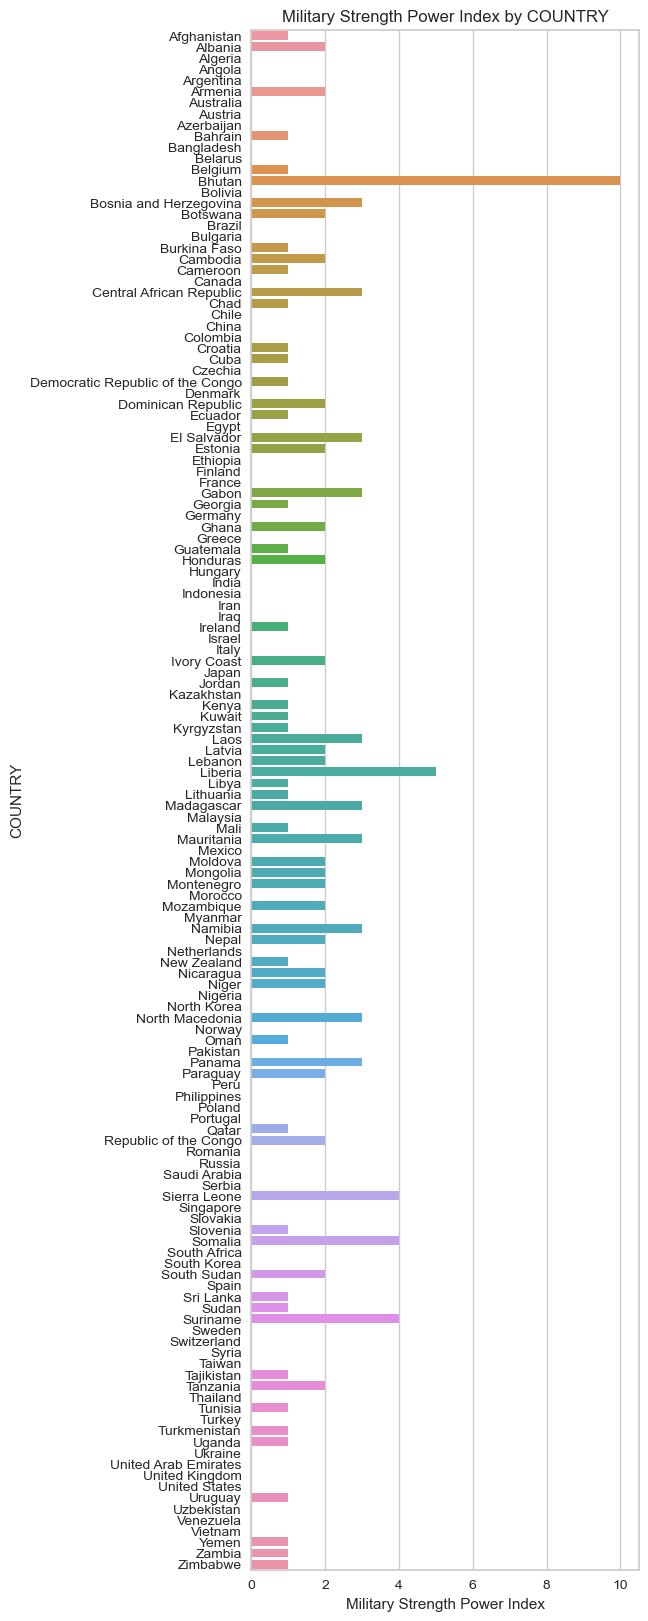

In [28]:
plt.figure(figsize=(5,20))
sns.barplot(x='Military Strength Power Index', y='COUNTRY',data=df)
plt.title('Military Strength Power Index by COUNTRY');

#### <font color=#2da6f7> Aircraft Strength value İlgileniyoruz

In [30]:
df['Aircraft Strength value']=df['Aircraft Strength value'].astype(int)

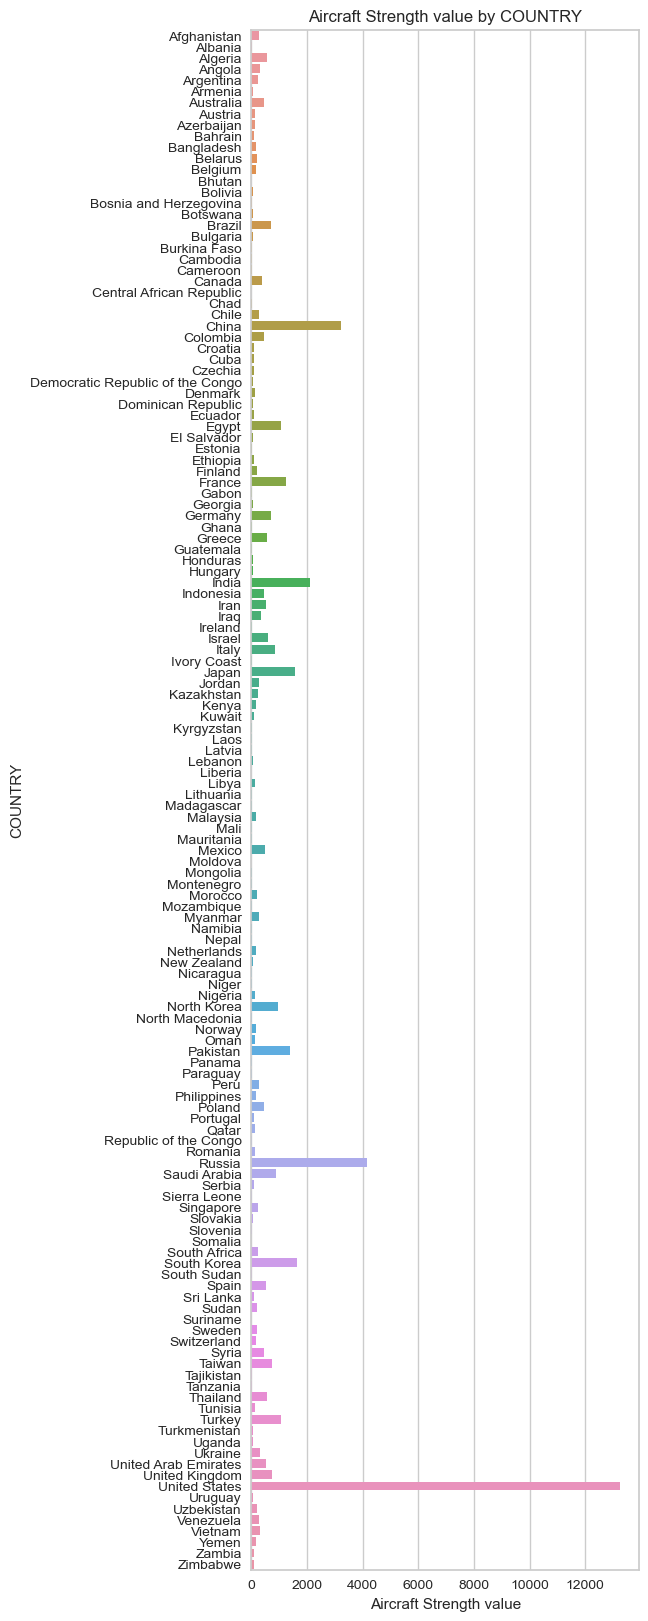

In [31]:
plt.figure(figsize=(5,20))
sns.barplot(x='Aircraft Strength value', y='COUNTRY',data=df)
plt.title('Aircraft Strength value by COUNTRY');

#### <font color=#2da6f7> Fighter/Interceptor Strength value İlgileniyoruz

In [33]:
df['Fighter/Interceptor Strength value']=df['Fighter/Interceptor Strength value'].astype(int)

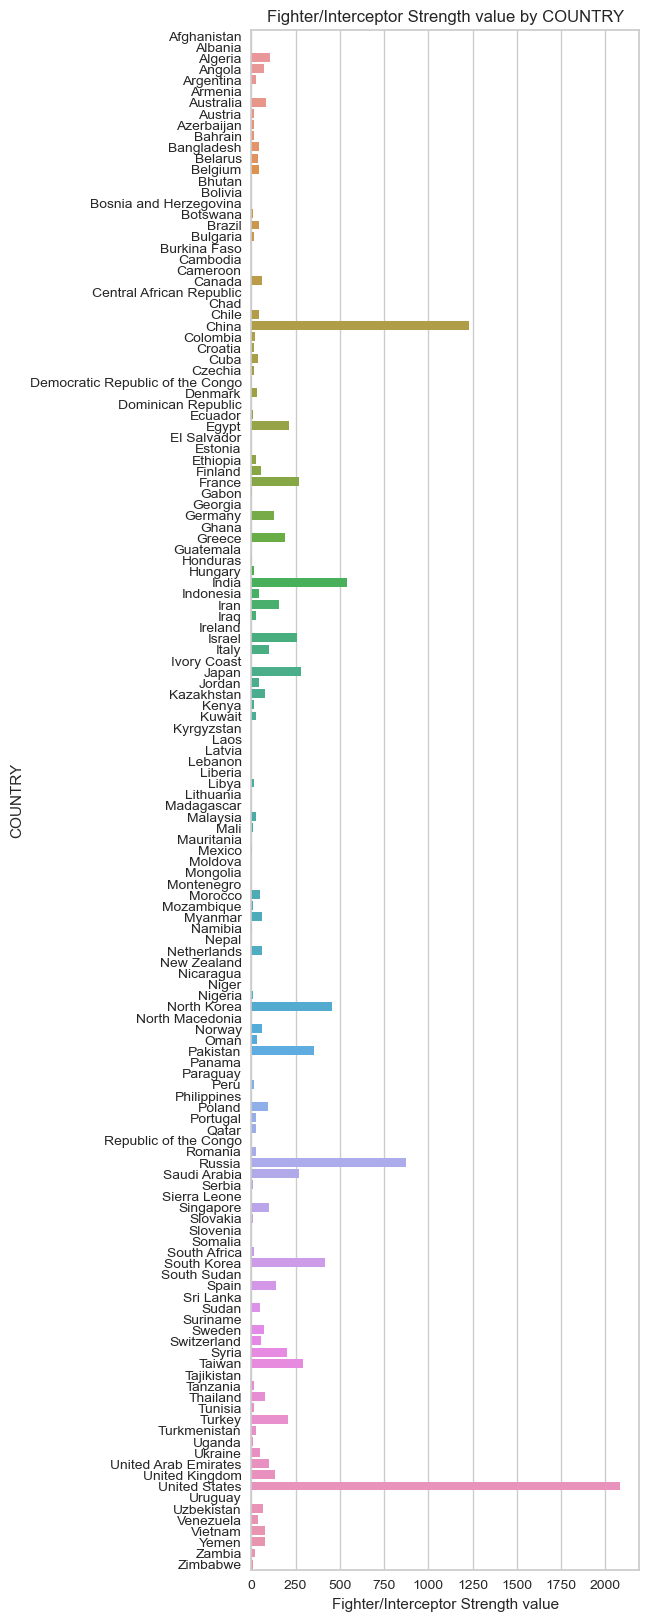

In [34]:
plt.figure(figsize=(5,20))
sns.barplot(x='Fighter/Interceptor Strength value', y='COUNTRY',data=df)
plt.title('Fighter/Interceptor Strength value by COUNTRY');

#### <font color=#2da6f7> Attack Aircraft Strength value İlgileniyoruz

In [36]:
df['Attack Aircraft Strength value']=df['Attack Aircraft Strength value'].astype(int)

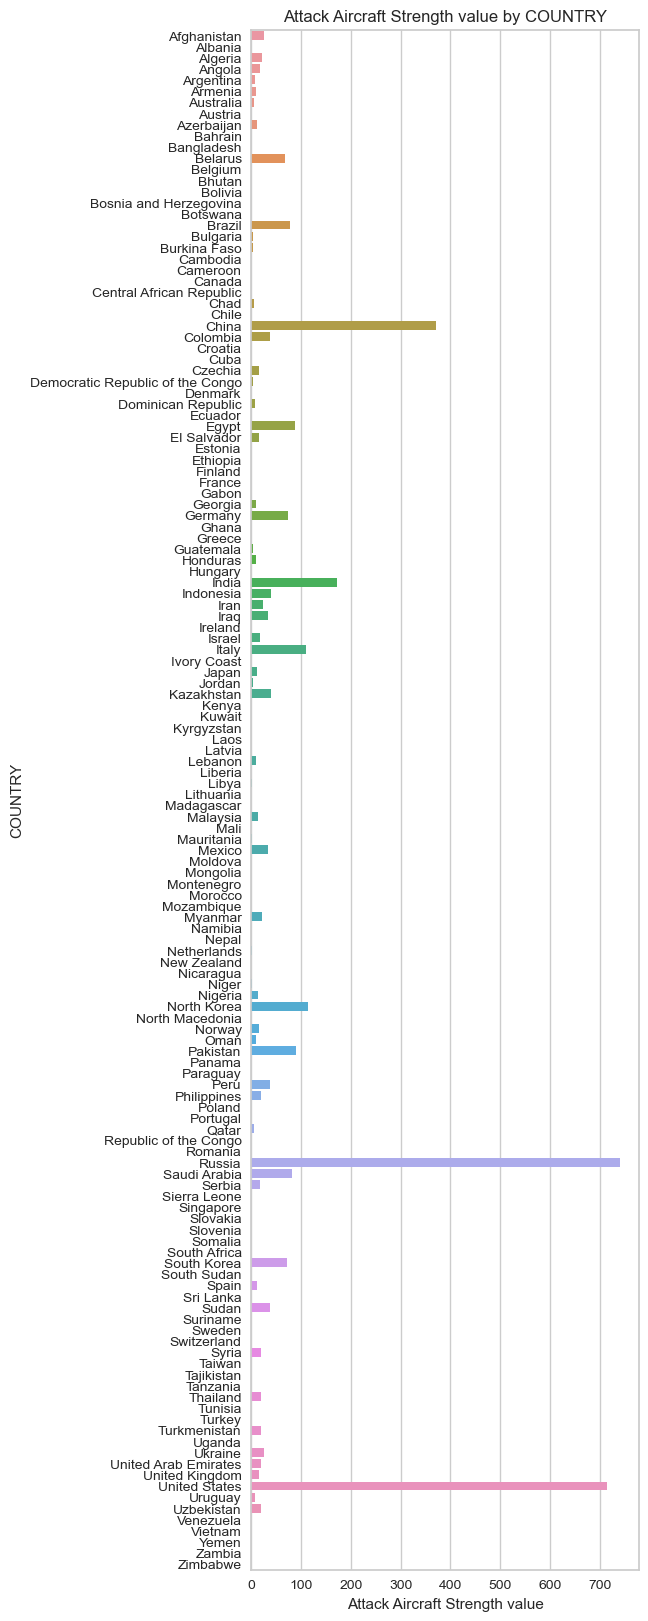

In [37]:
plt.figure(figsize=(5,20))
sns.barplot(x='Attack Aircraft Strength value', y='COUNTRY',data=df)
plt.title('Attack Aircraft Strength value by COUNTRY');

#### <font color=#2da6f7> Transport Aircraft Fleet Strength value İlgileniyoruz

In [39]:
df['Transport Aircraft Fleet Strength value']=df['Transport Aircraft Fleet Strength value'].astype(int)

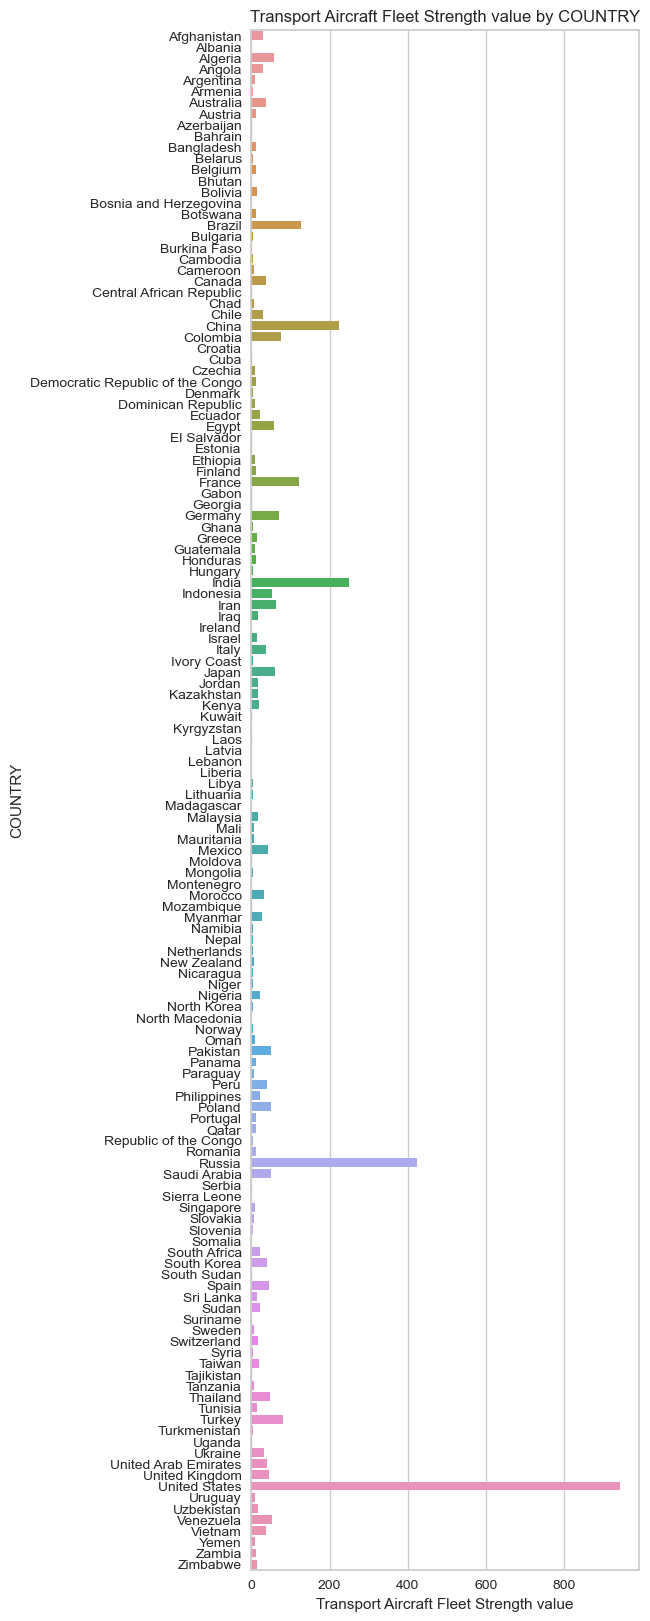

In [40]:
plt.figure(figsize=(5,20))
sns.barplot(x='Transport Aircraft Fleet Strength value', y='COUNTRY',data=df)
plt.title('Transport Aircraft Fleet Strength value by COUNTRY');

#### <font color=#2da6f7> Trainer Aircraft Fleet value İlgileniyoruz

In [42]:
df['Trainer Aircraft Fleet value']=df['Trainer Aircraft Fleet value'].astype(int)

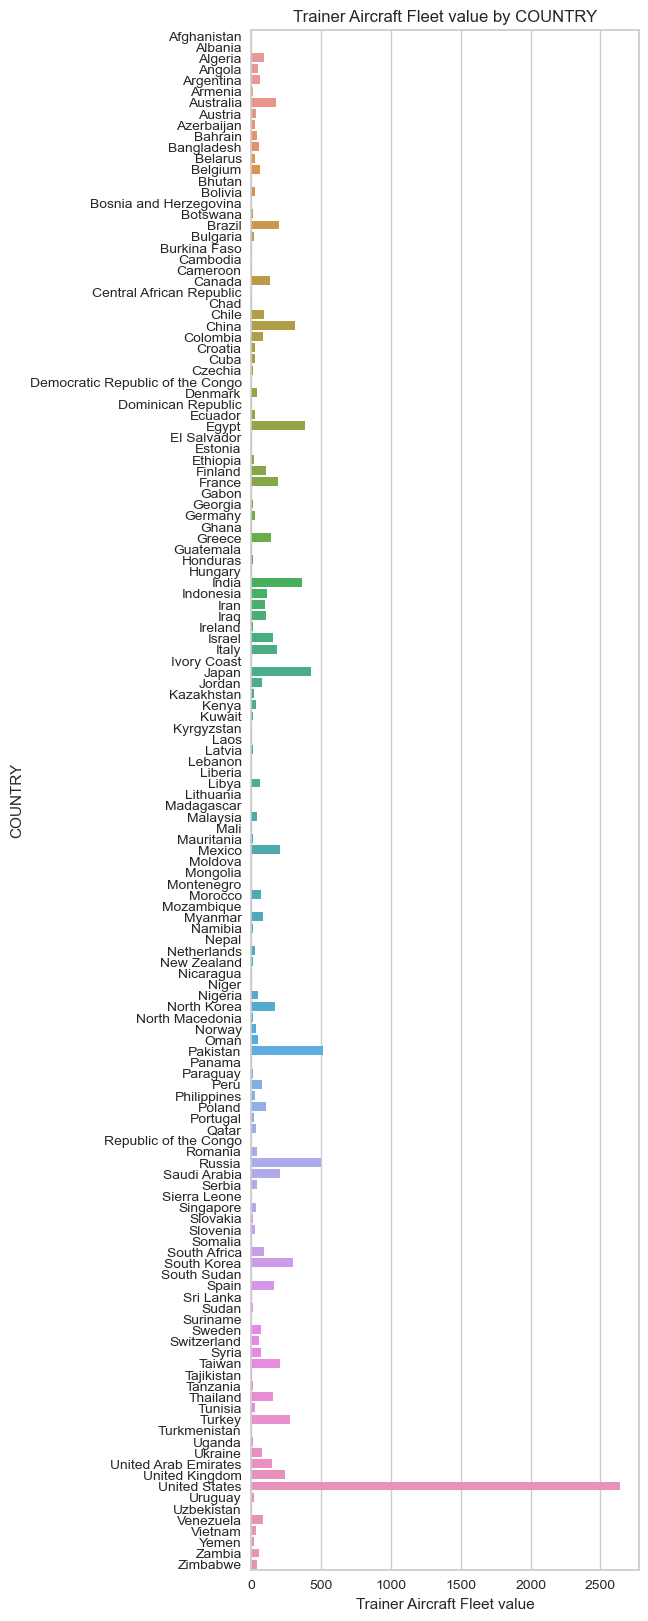

In [43]:
plt.figure(figsize=(5,20))
sns.barplot(x='Trainer Aircraft Fleet value', y='COUNTRY',data=df)
plt.title('Trainer Aircraft Fleet value by COUNTRY');

#### <font color=#2da6f7> Helicopter Fleet Strength value İlgileniyoruz

In [45]:
df['Helicopter Fleet Strength value']=df['Helicopter Fleet Strength value'].astype(int)

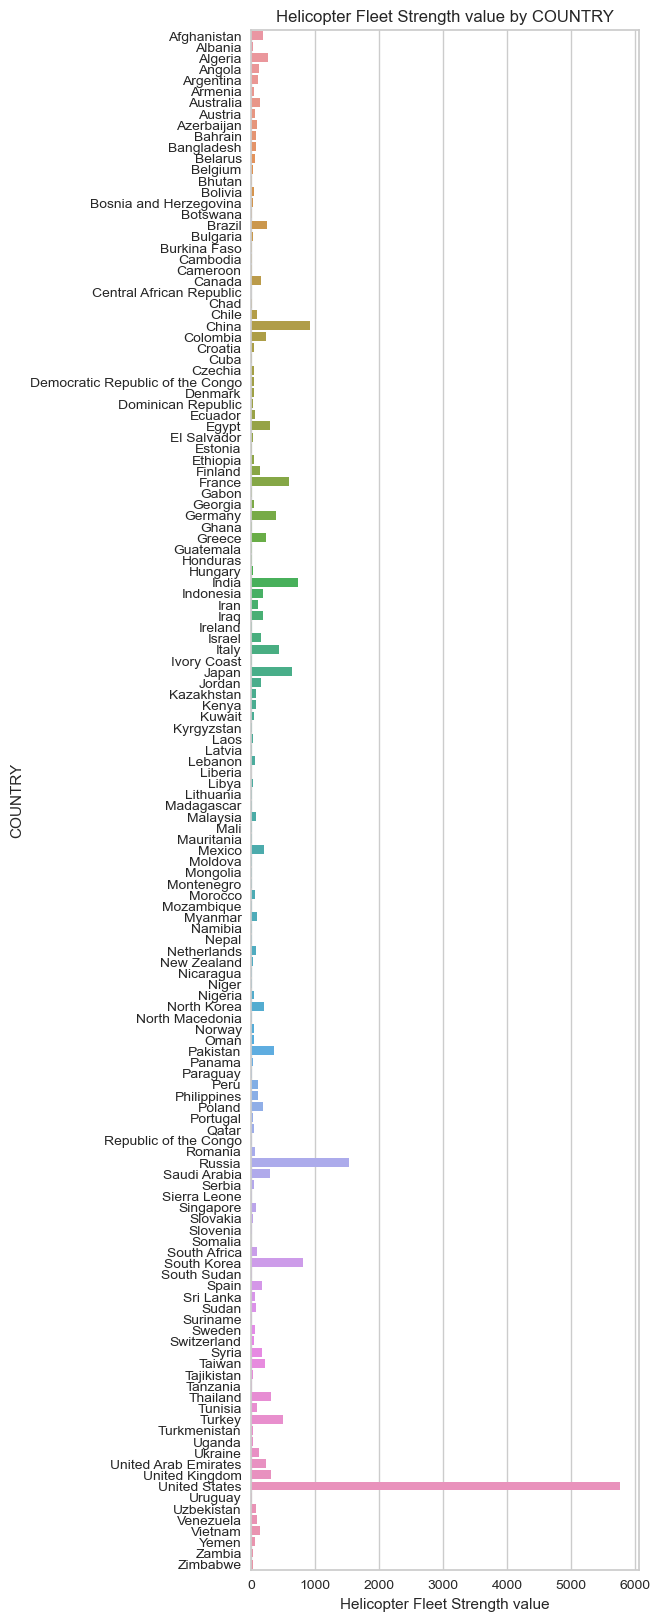

In [46]:
plt.figure(figsize=(5,20))
sns.barplot(x='Helicopter Fleet Strength value', y='COUNTRY',data=df)
plt.title('Helicopter Fleet Strength value by COUNTRY');

#### <font color=#2da6f7> Attack Helicopter Fleet Strength value İlgileniyoruz

In [48]:
df['Attack Helicopter Fleet Strength value']=df['Attack Helicopter Fleet Strength value'].astype(int)

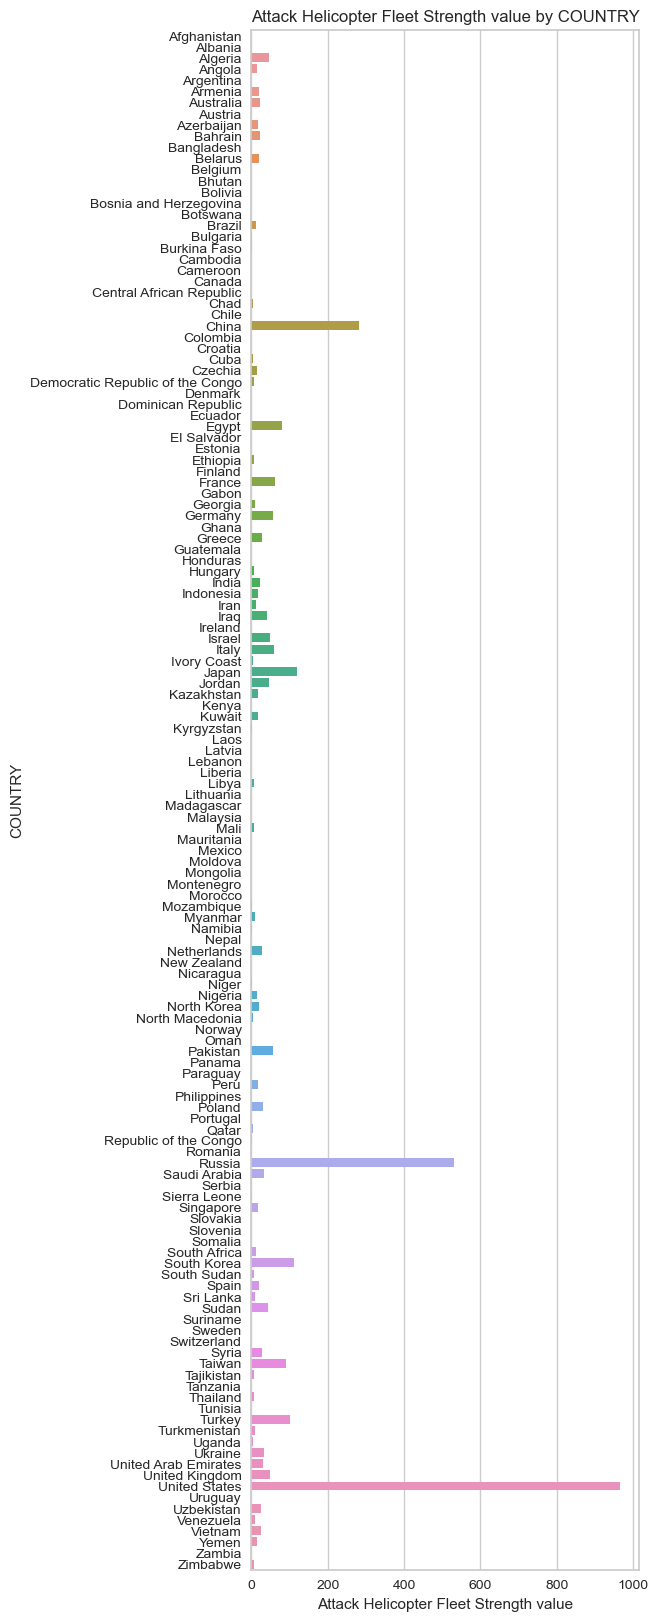

In [49]:
plt.figure(figsize=(5,20))
sns.barplot(x='Attack Helicopter Fleet Strength value', y='COUNTRY',data=df)
plt.title('Attack Helicopter Fleet Strength value by COUNTRY');

#### <font color=#2da6f7> Tank Strength value İlgileniyoruz

In [51]:
df['Tank Strength value']=df['Tank Strength value'].astype(int)

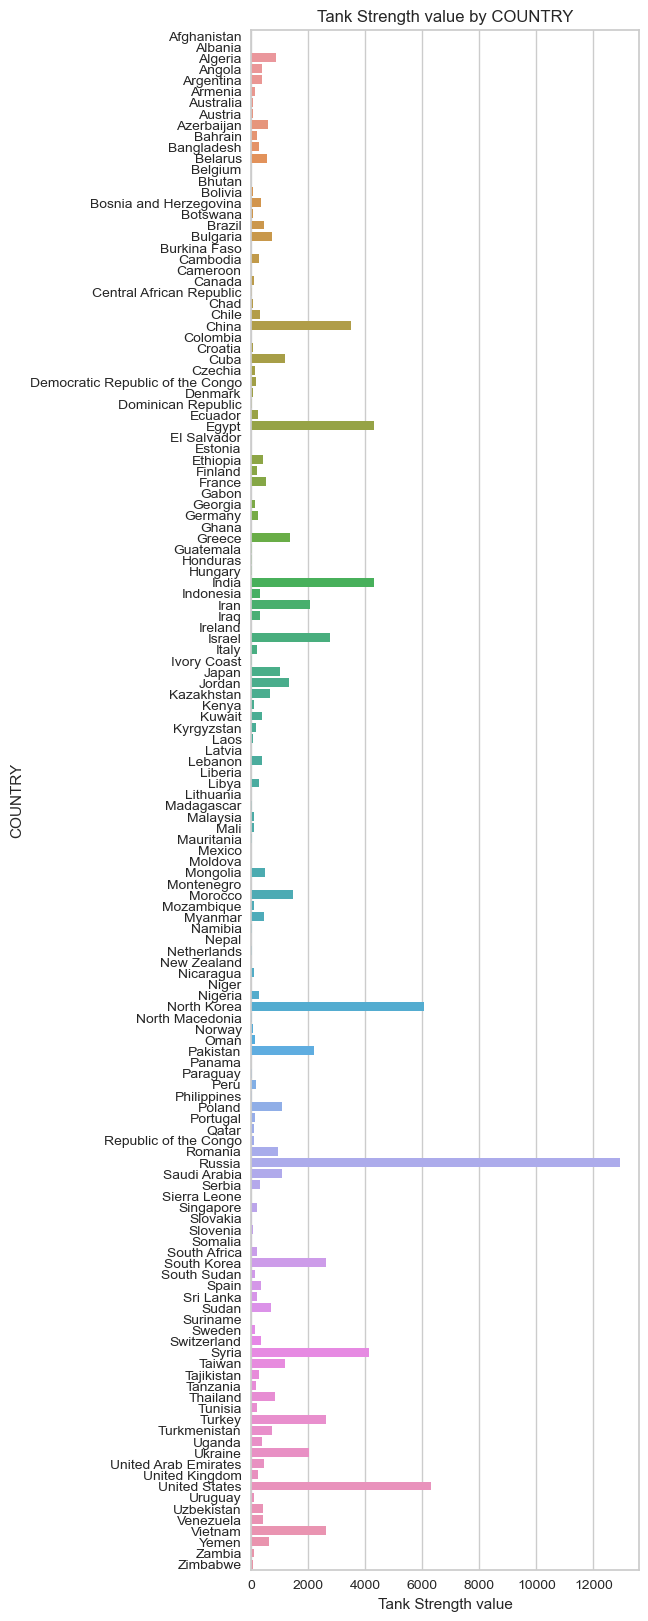

In [52]:
plt.figure(figsize=(5,20))
sns.barplot(x='Tank Strength value', y='COUNTRY',data=df)
plt.title('Tank Strength value by COUNTRY');

#### <font color=#2da6f7> AFV/APC Strength value İlgileniyoruz

In [54]:
df['AFV/APC Strength value']=df['AFV/APC Strength value'].astype(int)

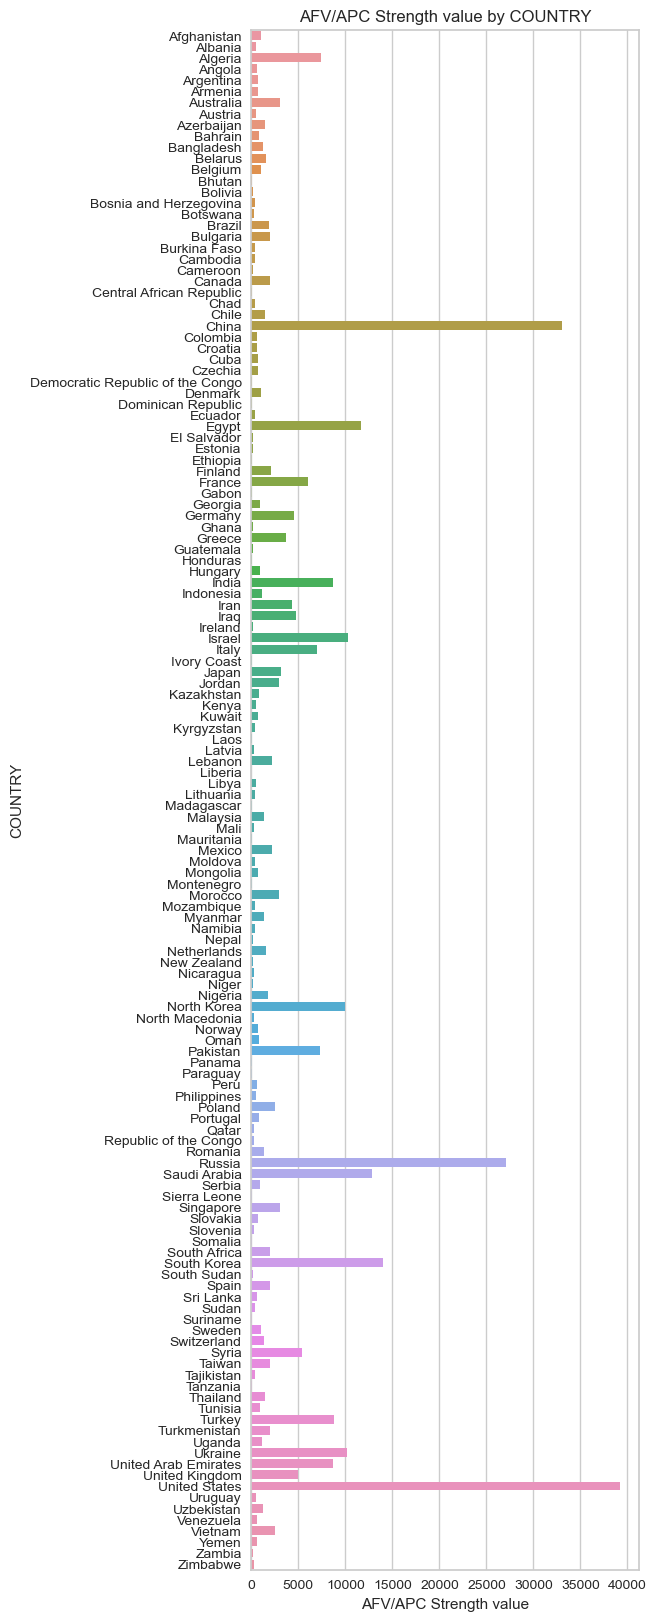

In [55]:
plt.figure(figsize=(5,20))
sns.barplot(x='AFV/APC Strength value', y='COUNTRY',data=df)
plt.title('AFV/APC Strength value by COUNTRY');

#### <font color=#2da6f7> Self-Propelled Artillery Strength value İlgileniyoruz

In [57]:
df['Self-Propelled Artillery Strength value']=df['Self-Propelled Artillery Strength value'].astype(int)

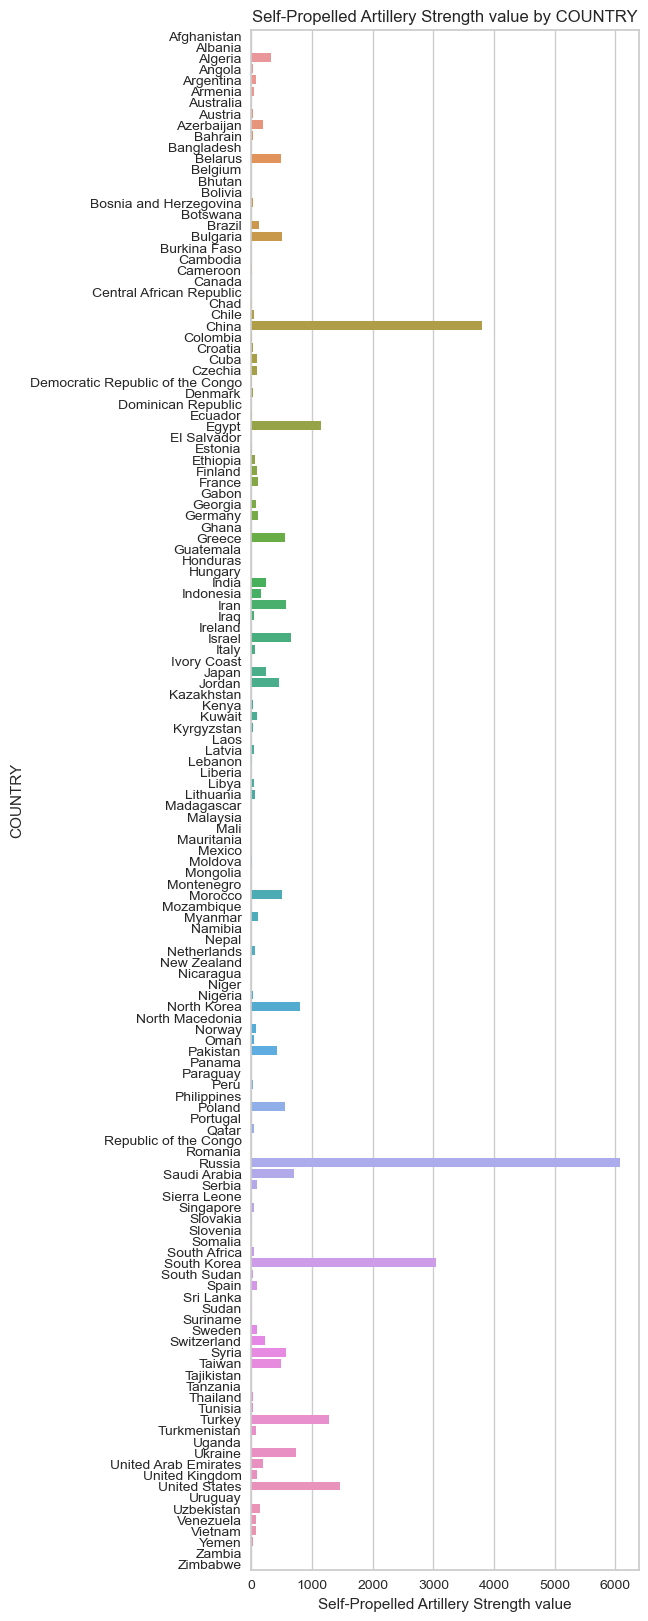

In [58]:
plt.figure(figsize=(5,20))
sns.barplot(x='Self-Propelled Artillery Strength value', y='COUNTRY',data=df)
plt.title('Self-Propelled Artillery Strength value by COUNTRY');

#### <font color=#2da6f7> Towed Artillery Strength value İlgileniyoruz

In [60]:
df['Towed Artillery Strength value']=df['Towed Artillery Strength value'].astype(int)

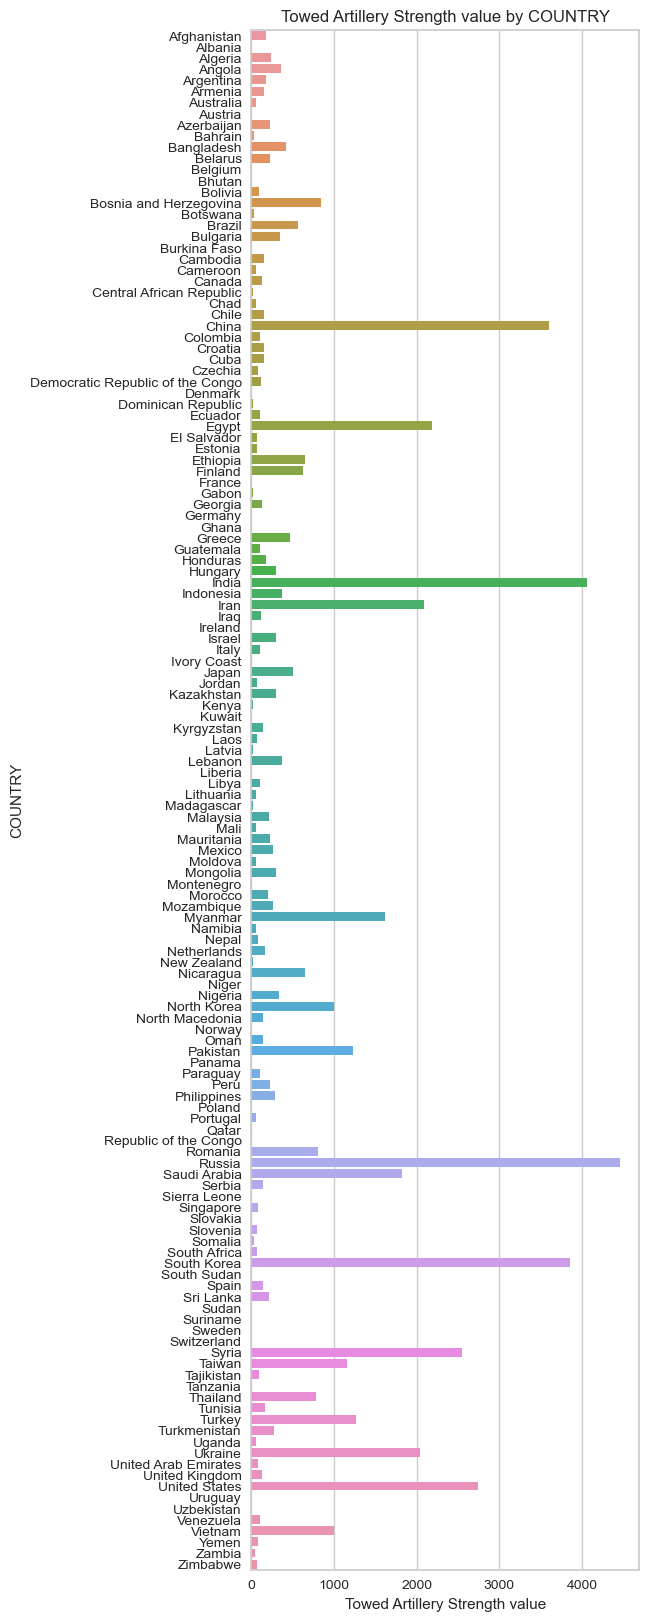

In [61]:
plt.figure(figsize=(5,20))
sns.barplot(x='Towed Artillery Strength value', y='COUNTRY',data=df)
plt.title('Towed Artillery Strength value by COUNTRY');

#### <font color=#2da6f7> Rocket Projector Strength value İlgileniyoruz

In [63]:
df['Rocket Projector Strength value']=df['Rocket Projector Strength value'].astype(int)

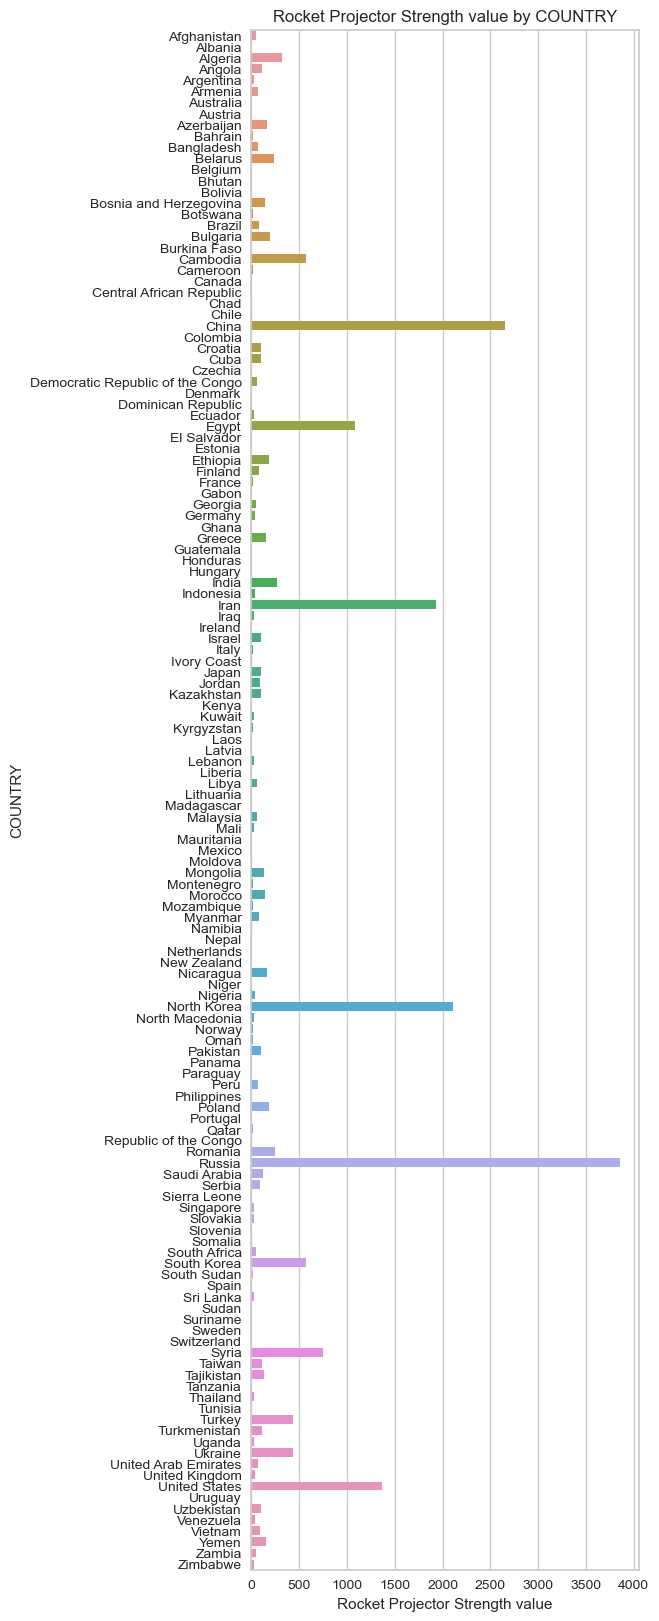

In [64]:
plt.figure(figsize=(5,20))
sns.barplot(x='Rocket Projector Strength value', y='COUNTRY',data=df)
plt.title('Rocket Projector Strength value by COUNTRY');

#### <font color=#2da6f7> Navy Fleet Strengths value İlgileniyoruz

In [66]:
df['Navy Fleet Strengths value']=df['Navy Fleet Strengths value'].replace(',','',regex=True)

In [67]:
df['Navy Fleet Strengths value']=df['Navy Fleet Strengths value'].fillna(0)

In [68]:
df['Navy Fleet Strengths value']=df['Navy Fleet Strengths value'].astype(int)

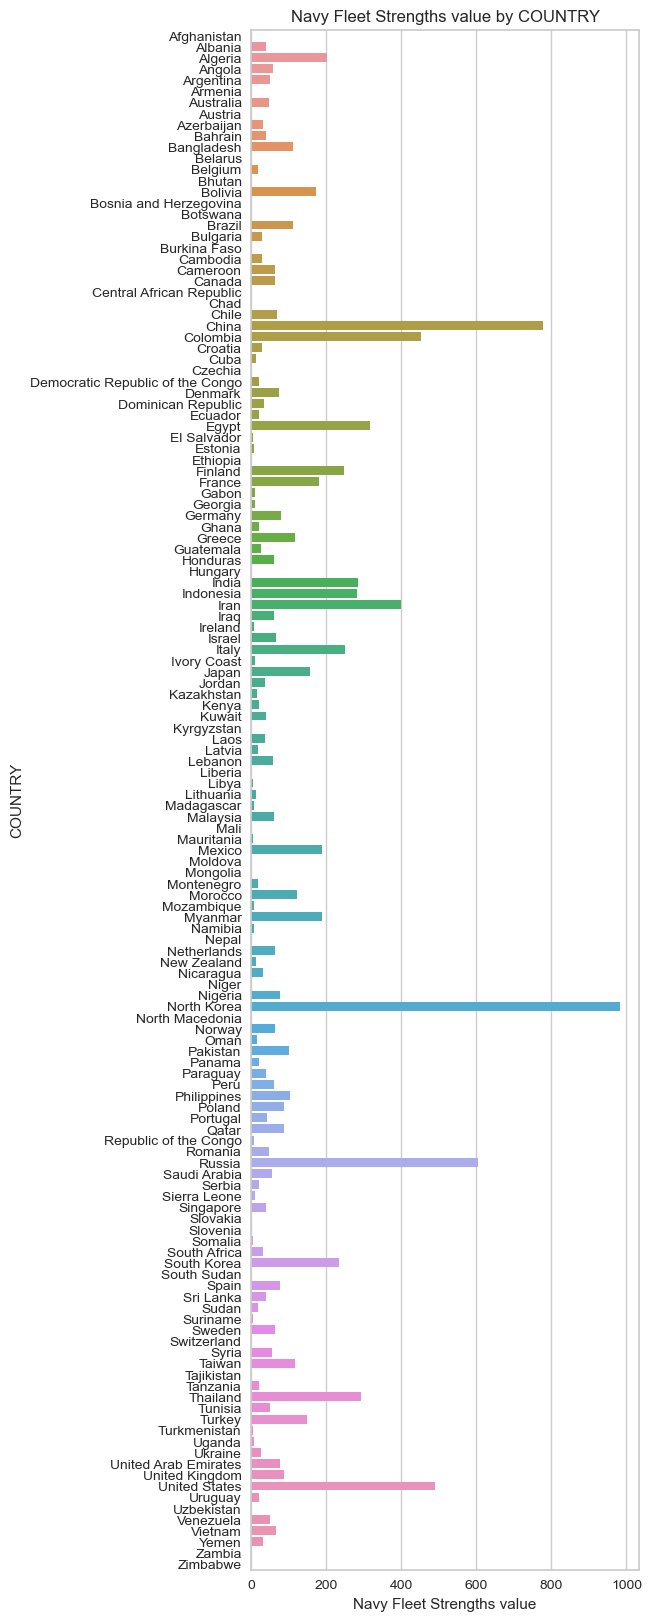

In [69]:
plt.figure(figsize=(5,20))
sns.barplot(x='Navy Fleet Strengths value', y='COUNTRY',data=df)
plt.title('Navy Fleet Strengths value by COUNTRY');

#### <font color=#2da6f7> Aircraft Carrier Fleet Strength value İlgileniyoruz

In [71]:
df['Aircraft Carrier Fleet Strength value']=df['Aircraft Carrier Fleet Strength value'].replace(',','',regex=True)

In [72]:
df['Aircraft Carrier Fleet Strength value']=df['Aircraft Carrier Fleet Strength value'].fillna(0)

In [73]:
df['Aircraft Carrier Fleet Strength value']=df['Aircraft Carrier Fleet Strength value'].astype(int)

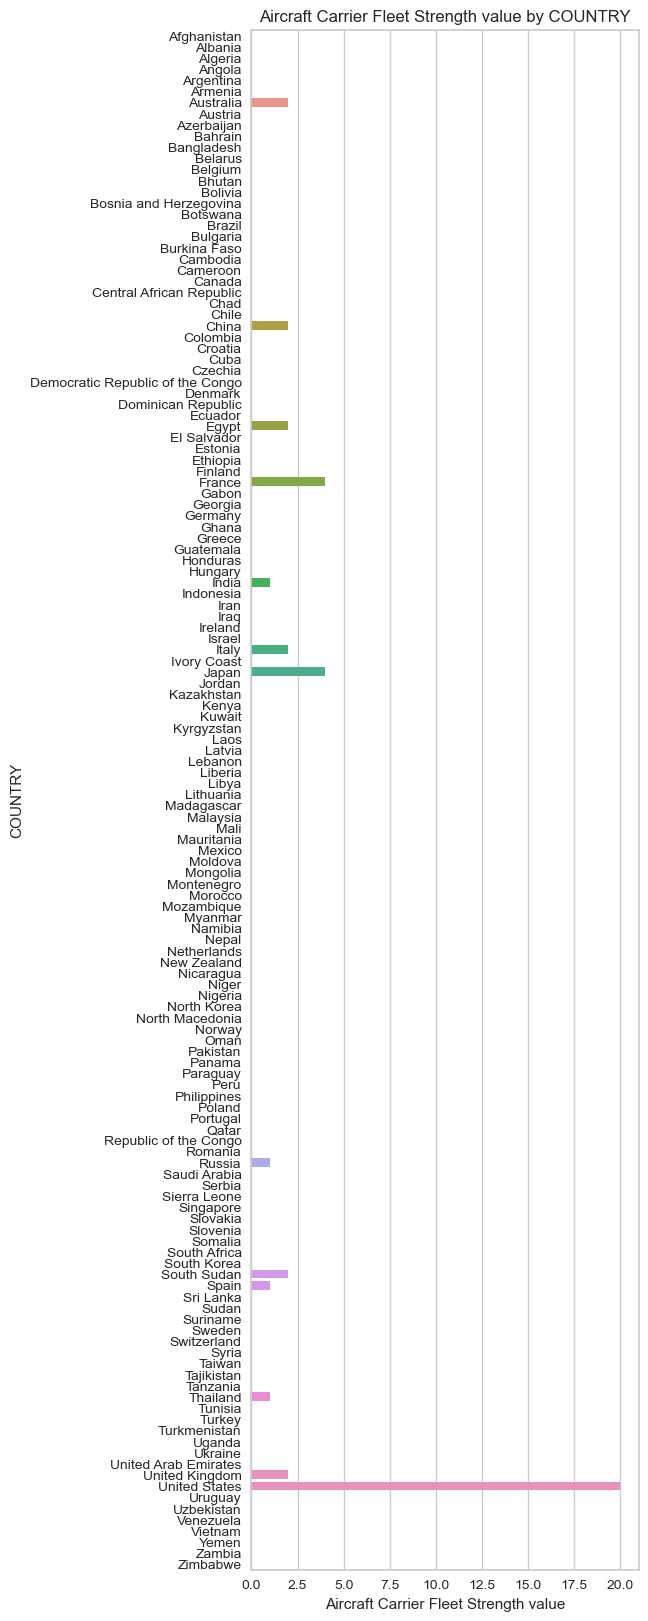

In [74]:
plt.figure(figsize=(5,20))
sns.barplot(x='Aircraft Carrier Fleet Strength value', y='COUNTRY',data=df)
plt.title('Aircraft Carrier Fleet Strength value by COUNTRY');

#### <font color=#2da6f7> Submarine Fleet Strength value İlgileniyoruz

In [76]:
df['Submarine Fleet Strength value']=df['Submarine Fleet Strength value'].replace(',','',regex=True)

In [77]:
df['Submarine Fleet Strength value']=df['Submarine Fleet Strength value'].fillna(0)

In [78]:
df['Submarine Fleet Strength value']=df['Submarine Fleet Strength value'].astype(int)

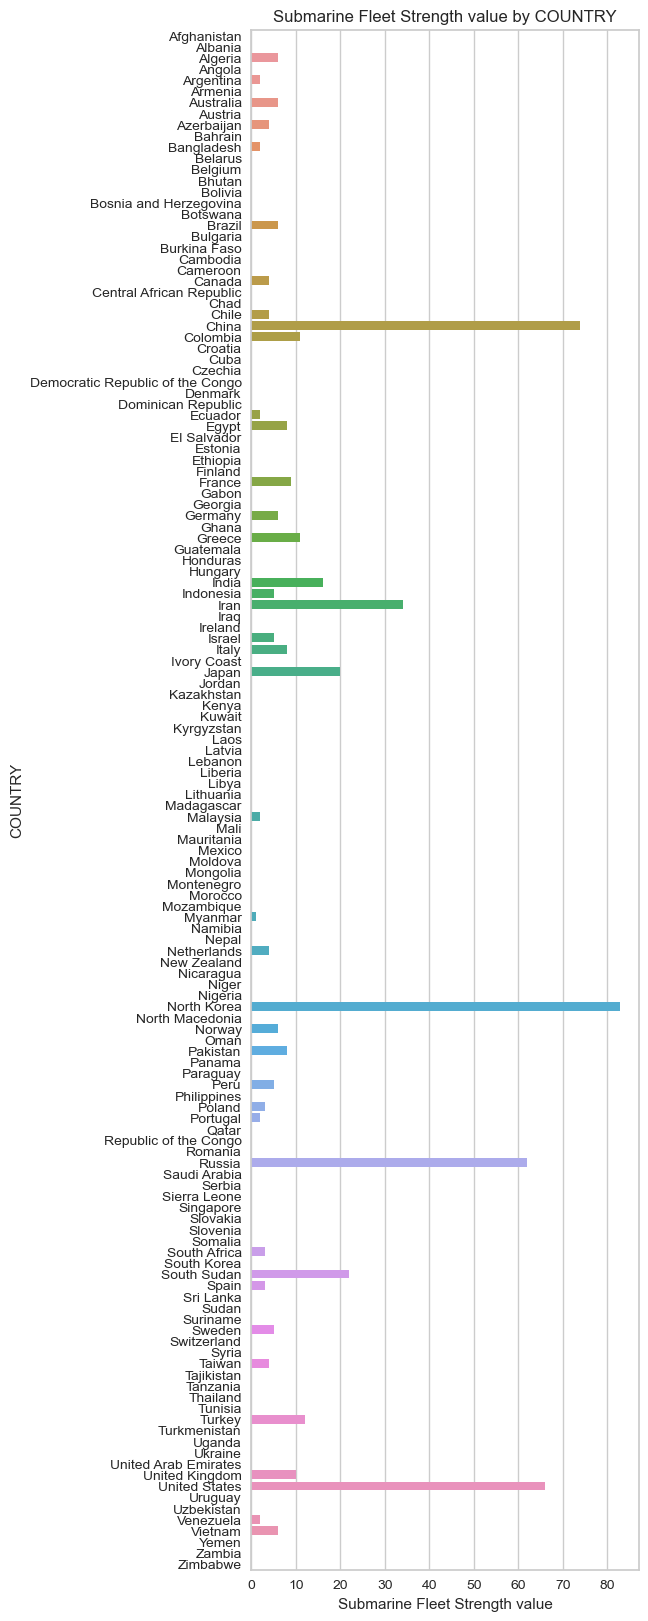

In [79]:
plt.figure(figsize=(5,20))
sns.barplot(x='Submarine Fleet Strength value', y='COUNTRY',data=df)
plt.title('Submarine Fleet Strength value by COUNTRY');

#### <font color=#2da6f7> Destroyer Fleet Strength value İlgileniyoruz

In [81]:
df['Destroyer Fleet Strength value']=df['Destroyer Fleet Strength value'].replace(',','',regex=True)

In [82]:
df['Destroyer Fleet Strength value']=df['Destroyer Fleet Strength value'].fillna(0)

In [83]:
df['Destroyer Fleet Strength value']=df['Destroyer Fleet Strength value'].astype(int)

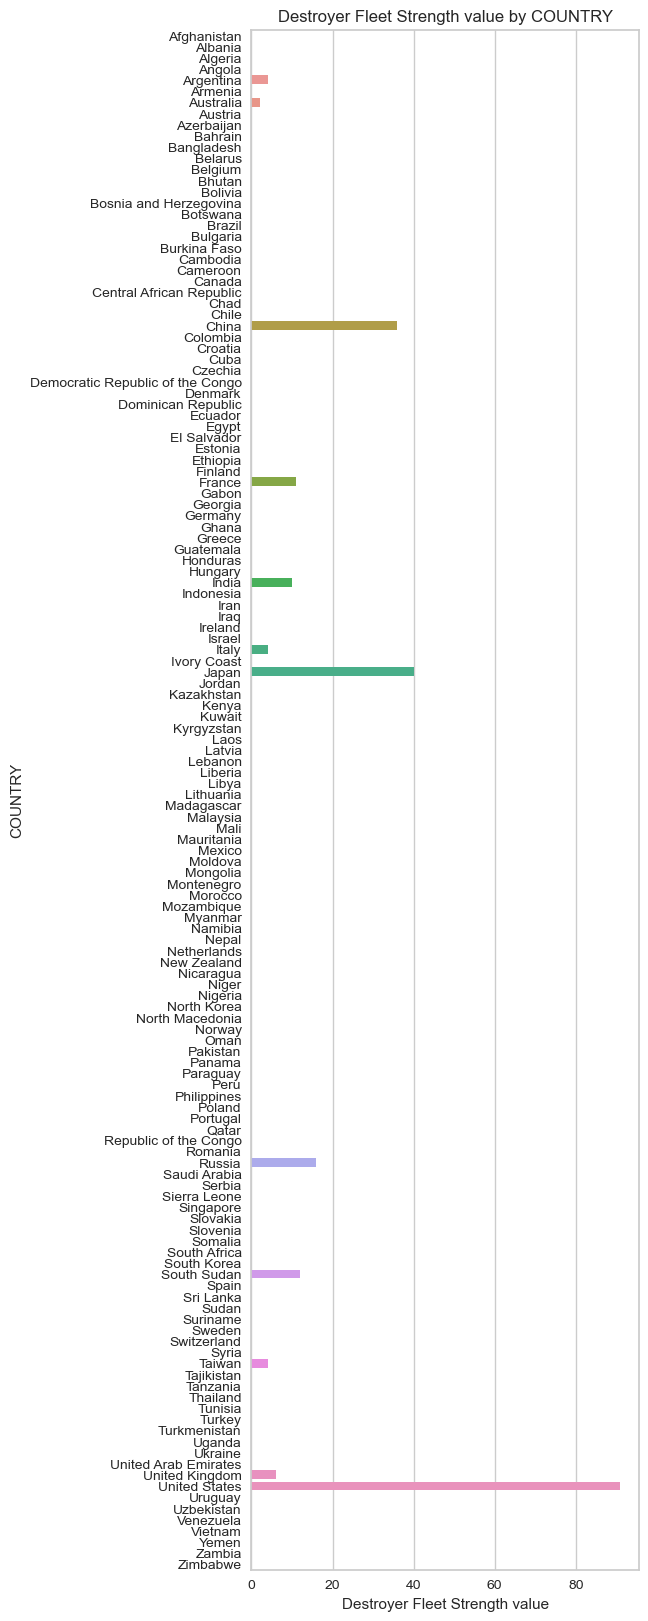

In [84]:
plt.figure(figsize=(5,20))
sns.barplot(x='Destroyer Fleet Strength value', y='COUNTRY',data=df)
plt.title('Destroyer Fleet Strength value by COUNTRY');

#### <font color=#2da6f7> Frigate Fleet Strength value İlgileniyoruz

In [86]:
df['Frigate Fleet Strength value']=df['Frigate Fleet Strength value'].replace(',','',regex=True)

In [87]:
df['Frigate Fleet Strength value']=df['Frigate Fleet Strength value'].fillna(0)

In [88]:
df['Frigate Fleet Strength value']=df['Frigate Fleet Strength value'].astype(int)

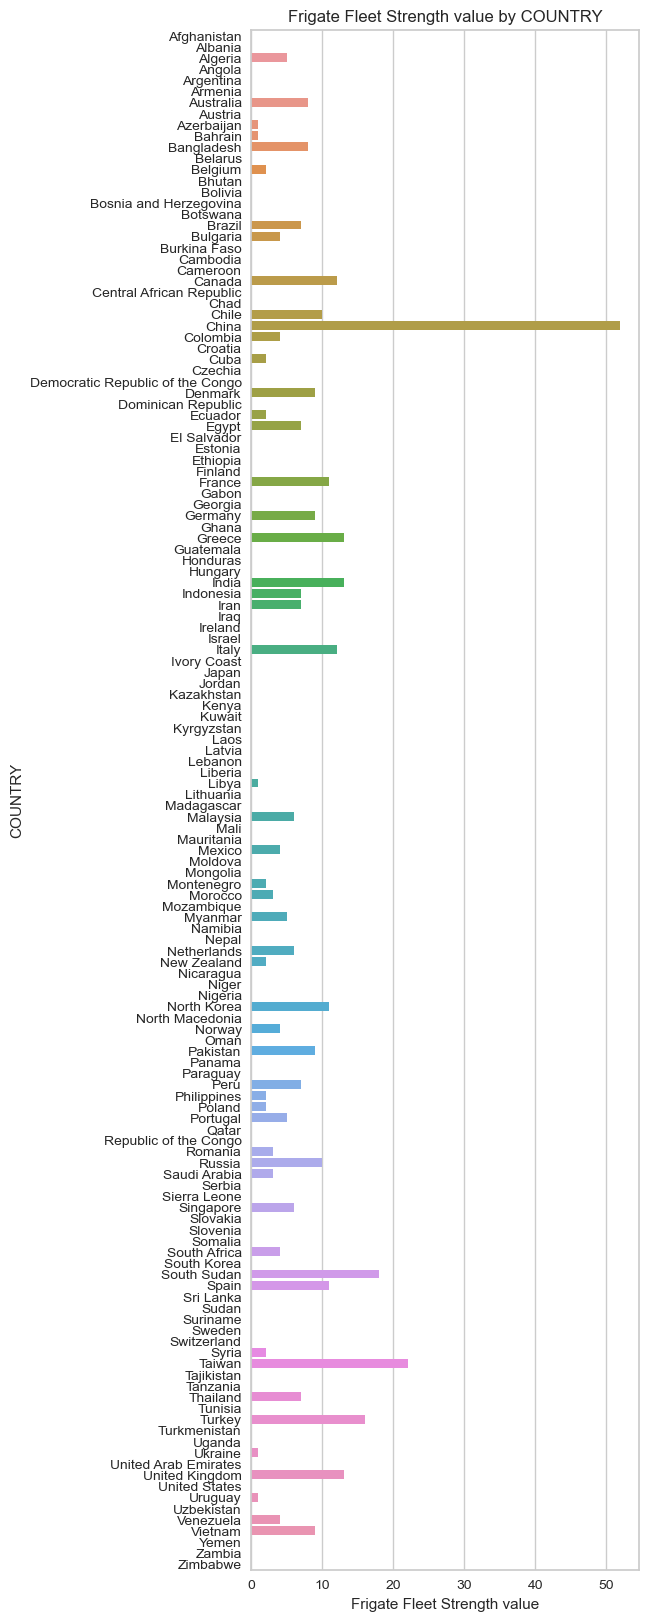

In [89]:
plt.figure(figsize=(5,20))
sns.barplot(x='Frigate Fleet Strength value', y='COUNTRY',data=df)
plt.title('Frigate Fleet Strength value by COUNTRY');

#### <font color=#2da6f7> defense spending budget value İlgileniyoruz

In [91]:
df['defense spending budget value']=df['defense spending budget value'].replace(',','',regex=True)

In [92]:
df['defense spending budget value']=df['defense spending budget value'].astype(float) #float yapmamım nedeni Python int too large to convert to C long hatası

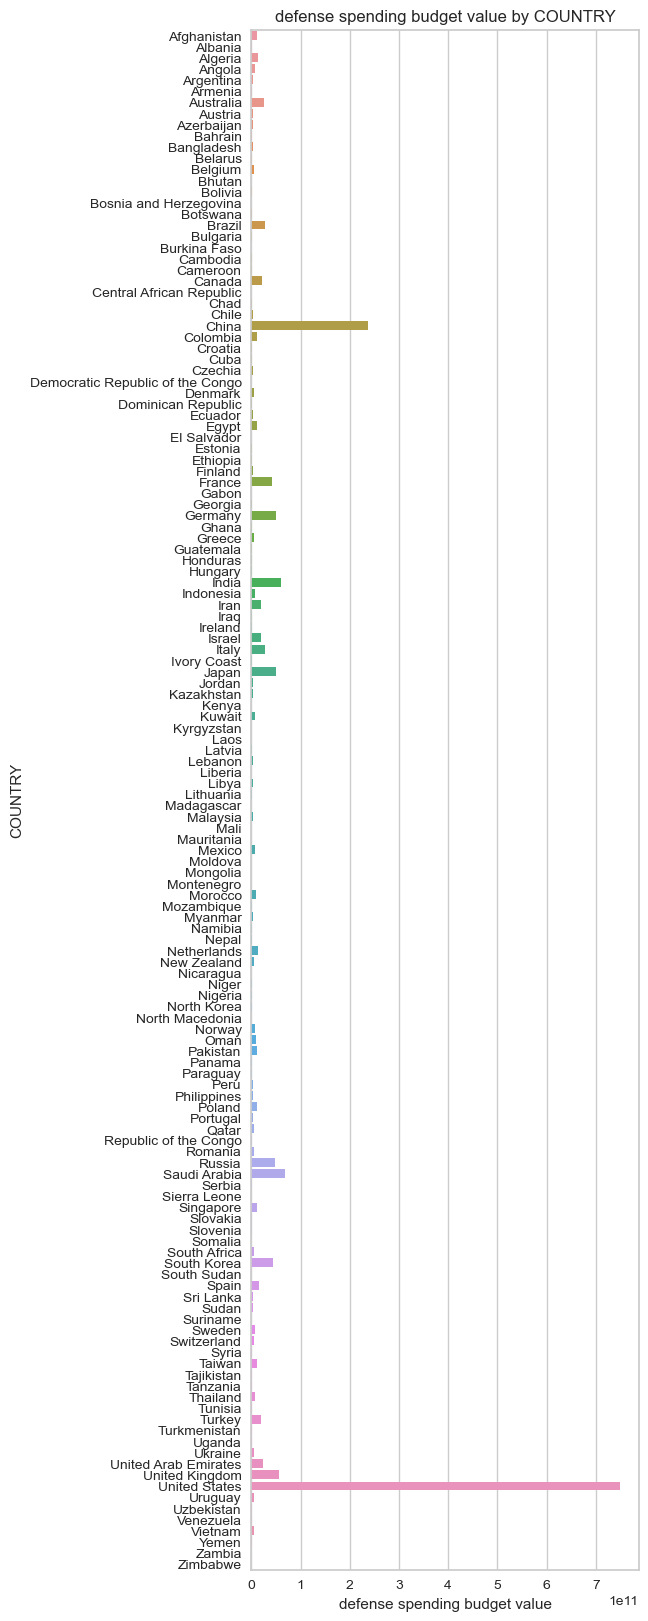

In [93]:
plt.figure(figsize=(5,20))
sns.barplot(x='defense spending budget value', y='COUNTRY',data=df)
plt.title('defense spending budget value by COUNTRY');

#### <font color=#2da6f7> External Debt value İlgileniyoruz

In [95]:
df['External Debt value']=df['External Debt value'].replace(',','',regex=True)

In [96]:
df['External Debt value']=df['External Debt value'].astype(float) #float yapmamım nedeni Python int too large to convert to C long hatası

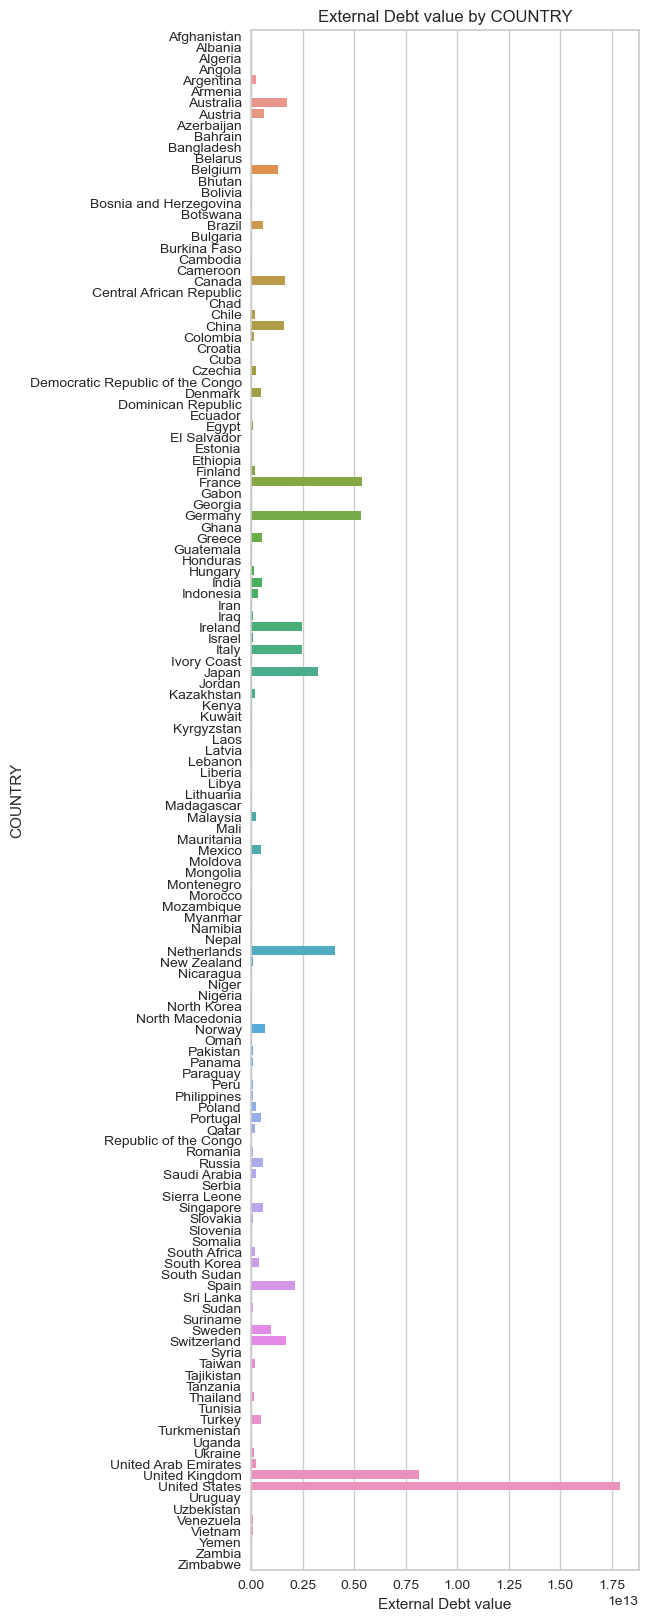

In [97]:
plt.figure(figsize=(5,20))
sns.barplot(x='External Debt value', y='COUNTRY',data=df)
plt.title('External Debt value by COUNTRY');

#### <font color=#2da6f7> Airport Totals value İlgileniyoruz

In [99]:
df['Airport Totals value']=df['Airport Totals value'].astype(int)

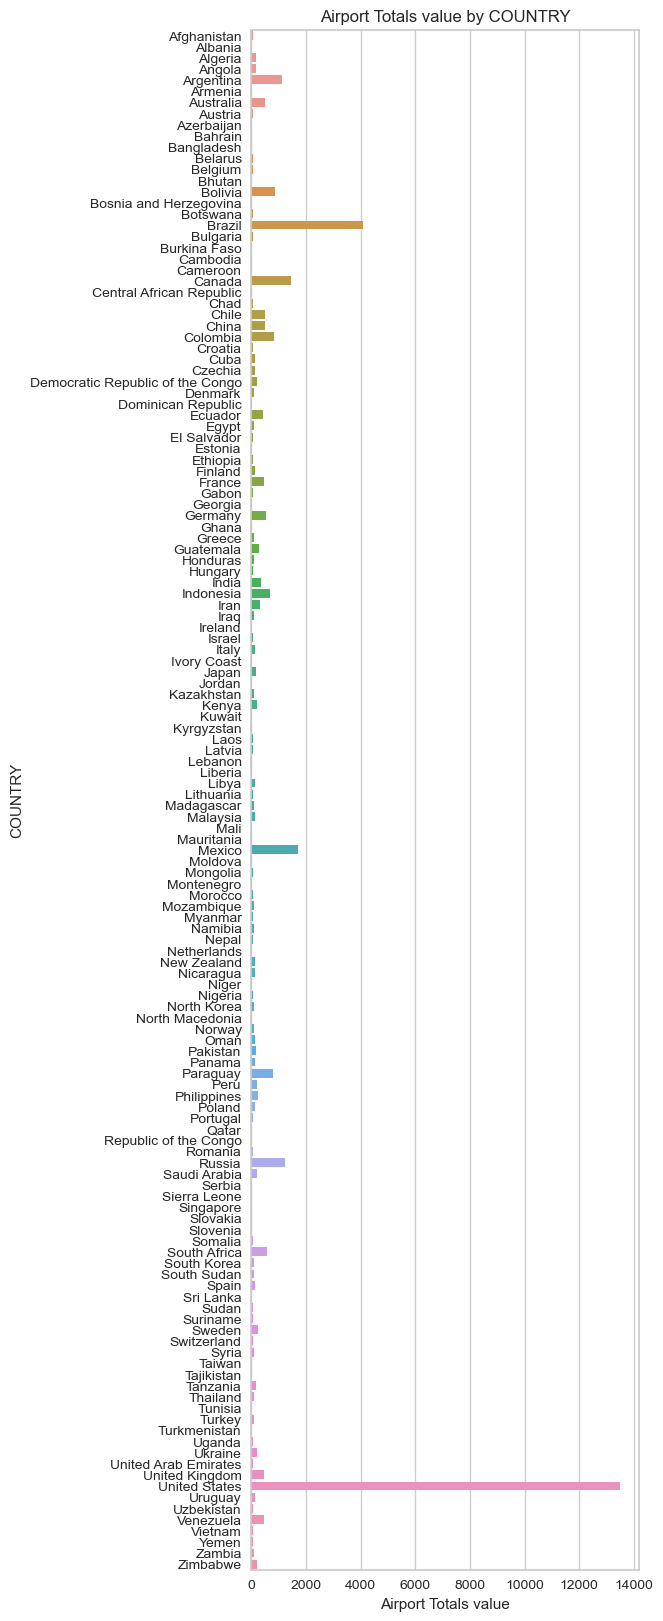

In [100]:
plt.figure(figsize=(5,20))
sns.barplot(x='Airport Totals value', y='COUNTRY',data=df)
plt.title('Airport Totals value by COUNTRY');

#### <font color=#2da6f7> Oil Production value İlgileniyoruz

In [102]:
df['Oil Production value']=df['Oil Production value'].replace(',','',regex=True)

In [103]:
df['Oil Production value']=df['Oil Production value'].astype(int)

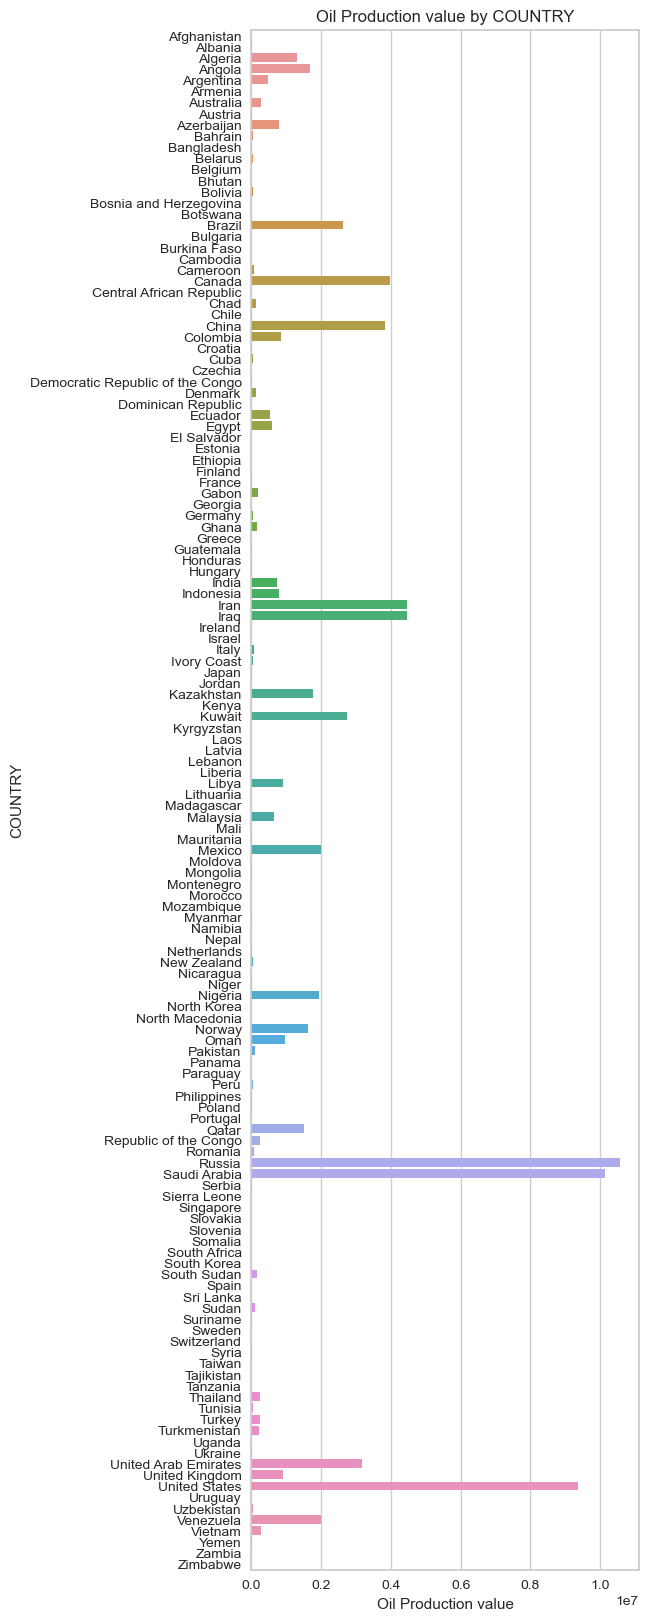

In [104]:
plt.figure(figsize=(5,20))
sns.barplot(x='Oil Production value', y='COUNTRY',data=df)
plt.title('Oil Production value by COUNTRY');

#### <font color=#2da6f7> Oil Consumption value İlgileniyoruz

In [106]:
df['Oil Consumption value']=df['Oil Consumption value'].replace(',','',regex=True)

In [107]:
df['Oil Consumption value']=df['Oil Consumption value'].astype(int)

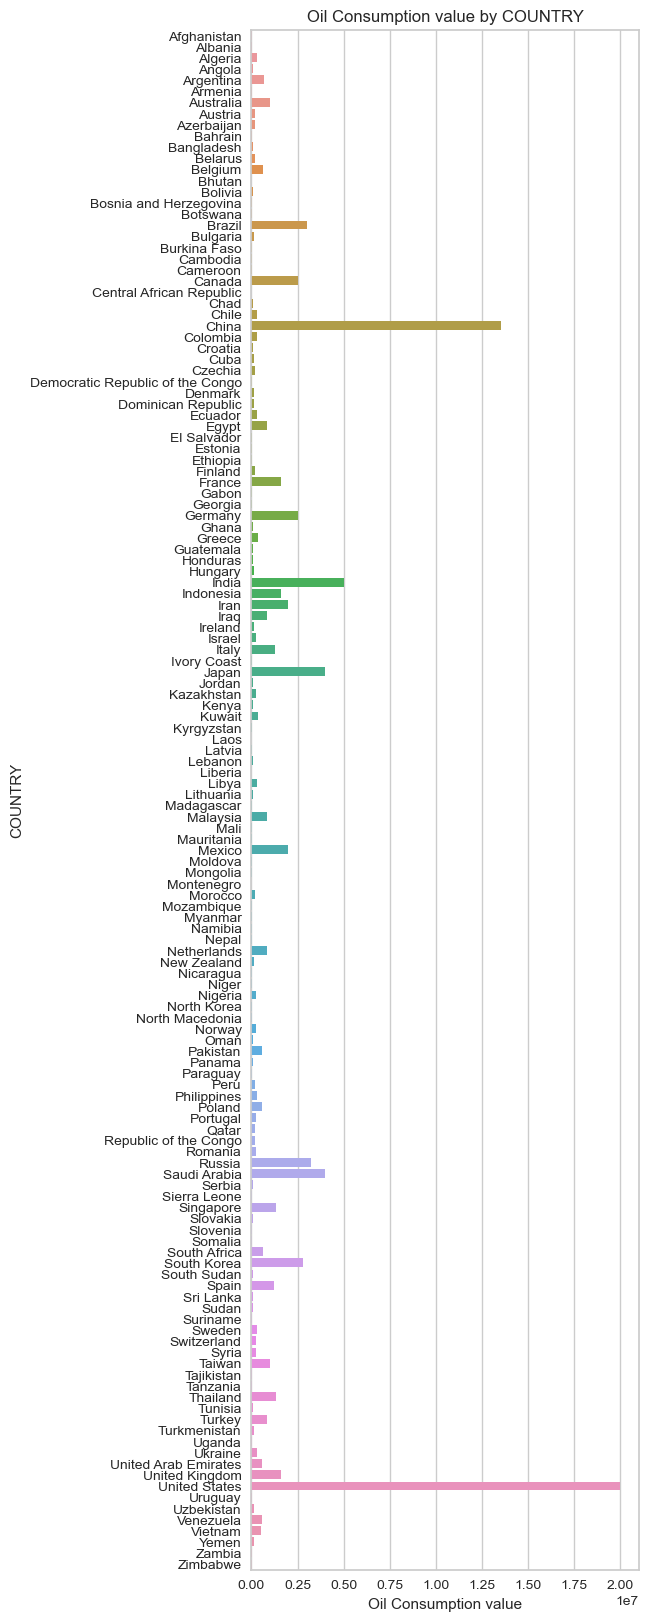

In [108]:
plt.figure(figsize=(5,20))
sns.barplot(x='Oil Consumption value', y='COUNTRY',data=df)
plt.title('Oil Consumption value by COUNTRY');

#### <font color=#2da6f7> Proven Oil Reserves value İlgileniyoruz

In [110]:
df['Proven Oil Reserves value']=df['Proven Oil Reserves value'].replace(',','',regex=True)

In [111]:
df['Proven Oil Reserves value']=df['Proven Oil Reserves value'].astype(float) #float yapmamım nedeni Python int too large to convert to C long hatası

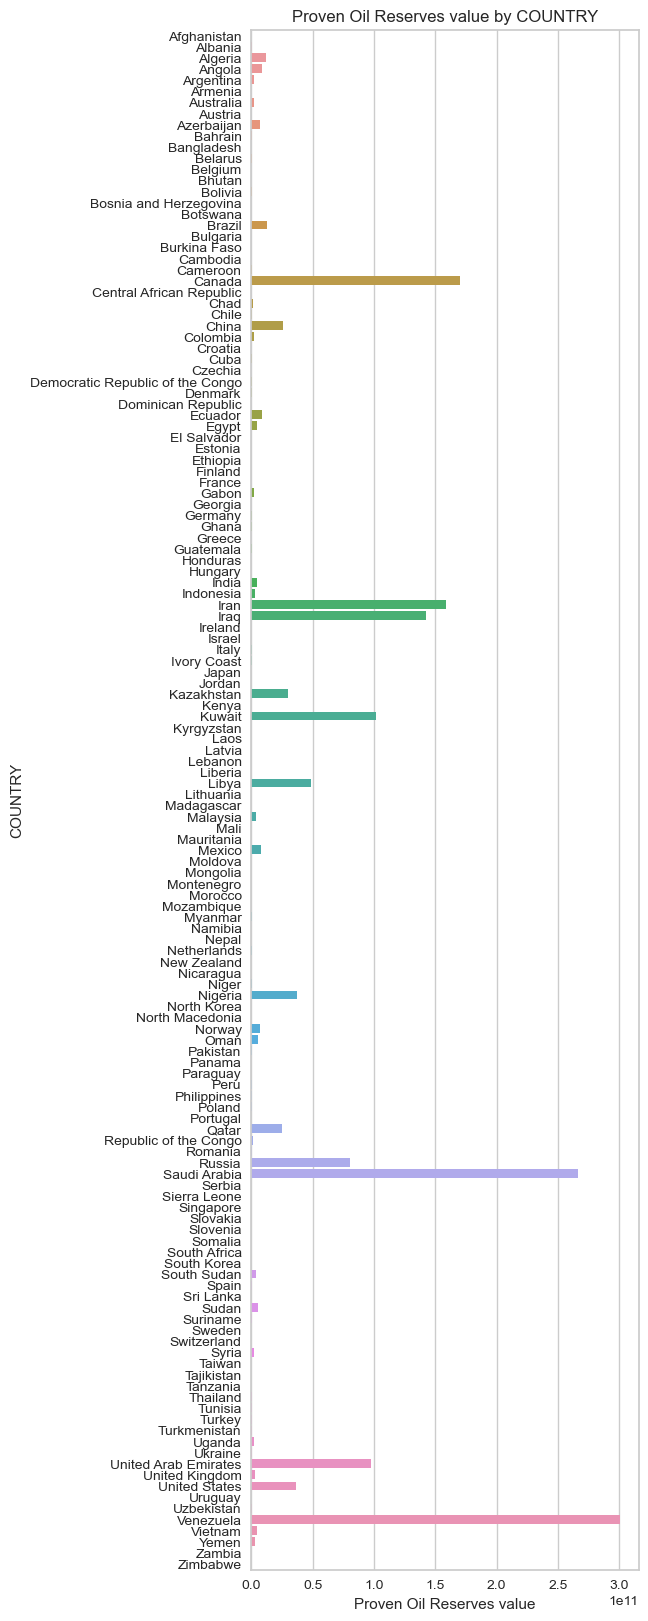

In [112]:
plt.figure(figsize=(5,20))
sns.barplot(x='Proven Oil Reserves value', y='COUNTRY',data=df)
plt.title('Proven Oil Reserves value by COUNTRY');

#### <font color=#2da6f7> Available Manpower value İlgileniyoruz

In [114]:
df['Available Manpower value']=df['Available Manpower value'].replace(',','',regex=True)

In [115]:
df['Available Manpower value']=df['Available Manpower value'].astype(int)

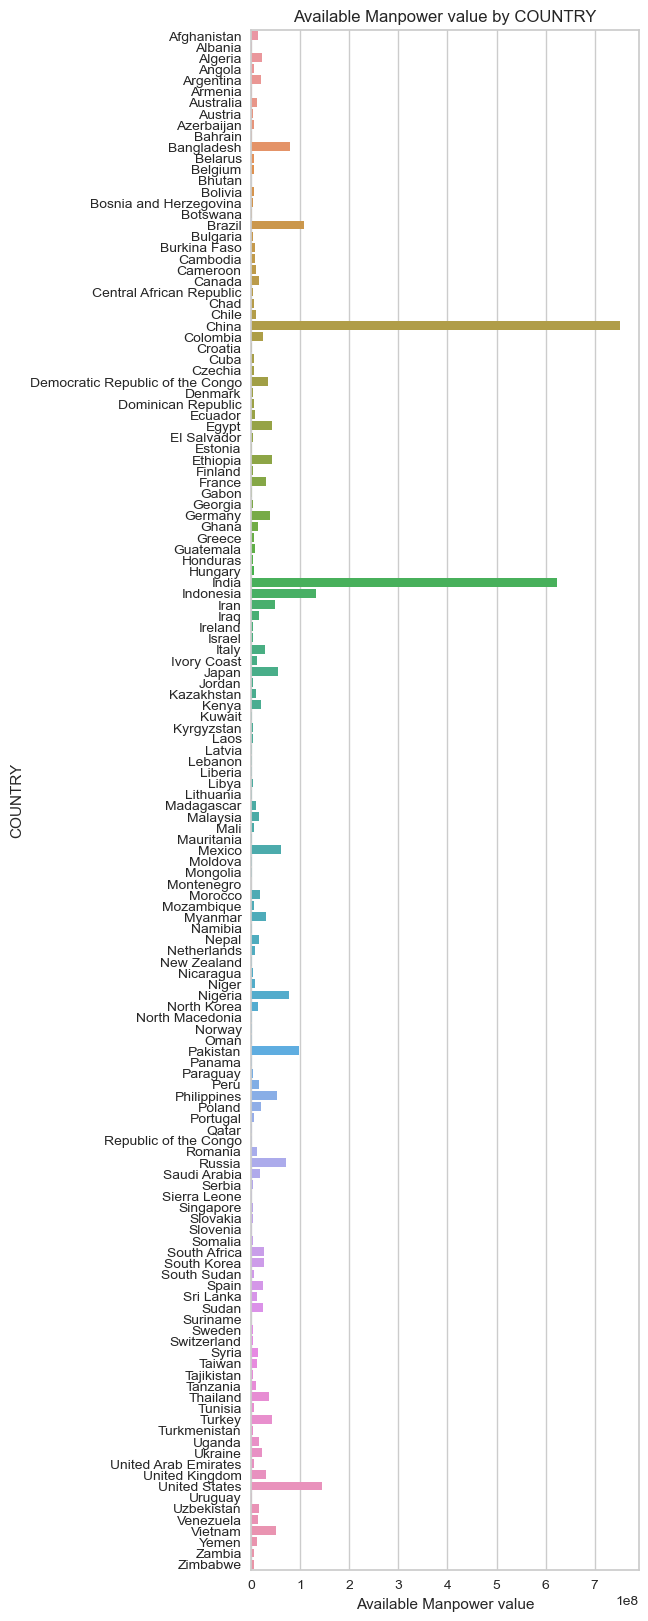

In [116]:
plt.figure(figsize=(5,20))
sns.barplot(x='Available Manpower value', y='COUNTRY',data=df)
plt.title('Available Manpower value by COUNTRY');

#### <font color=#2da6f7> Total Population value İlgileniyoruz

In [118]:
df['Total Population value']=df['Total Population value'].replace(',','',regex=True)

In [119]:
df['Total Population value']=df['Total Population value'].astype(int)

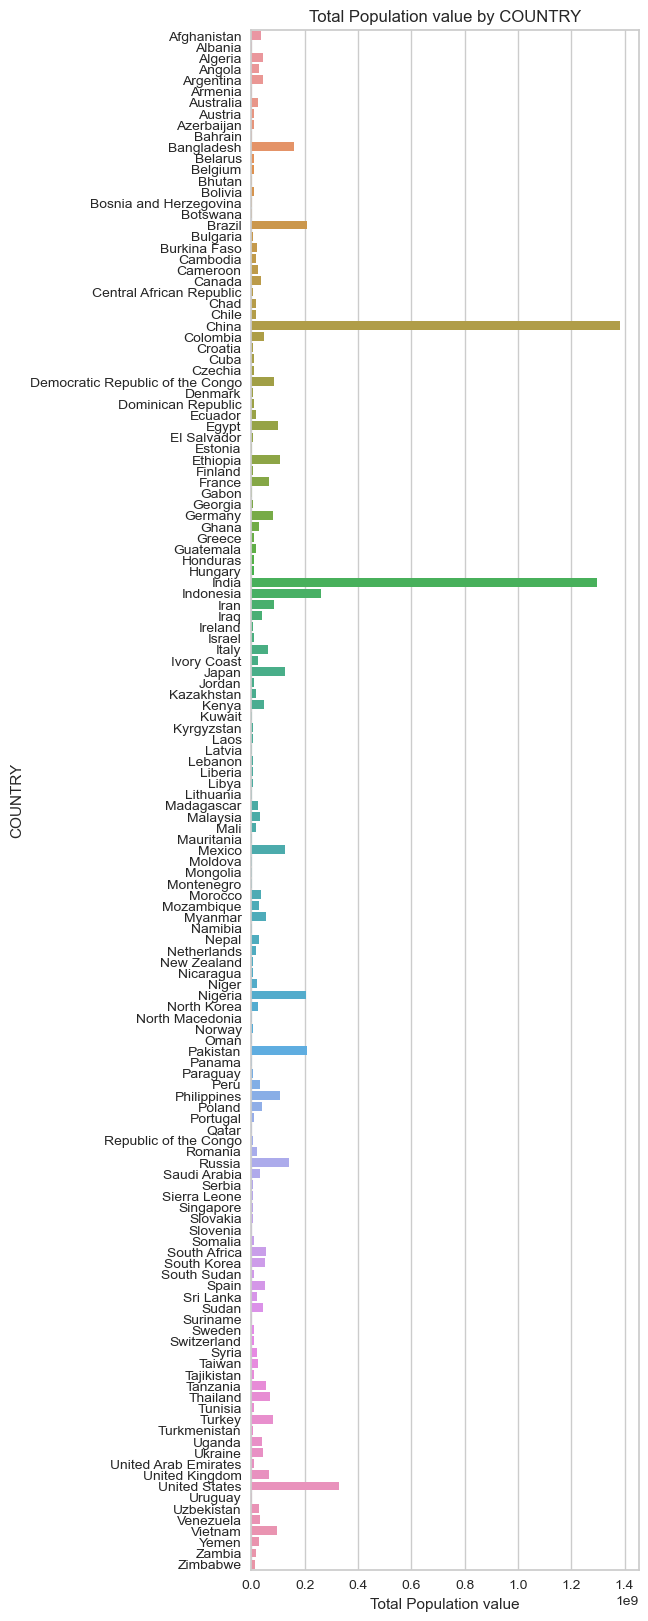

In [120]:
plt.figure(figsize=(5,20))
sns.barplot(x='Total Population value', y='COUNTRY',data=df)
plt.title('Total Population value by COUNTRY');

#### <font color=#2da6f7> Total Square Land Area value İlgileniyoruz

In [122]:
df['Total Square Land Area value']=df['Total Square Land Area value'].replace(',','',regex=True)

In [123]:
df['Total Square Land Area value']=df['Total Square Land Area value'].astype(int)

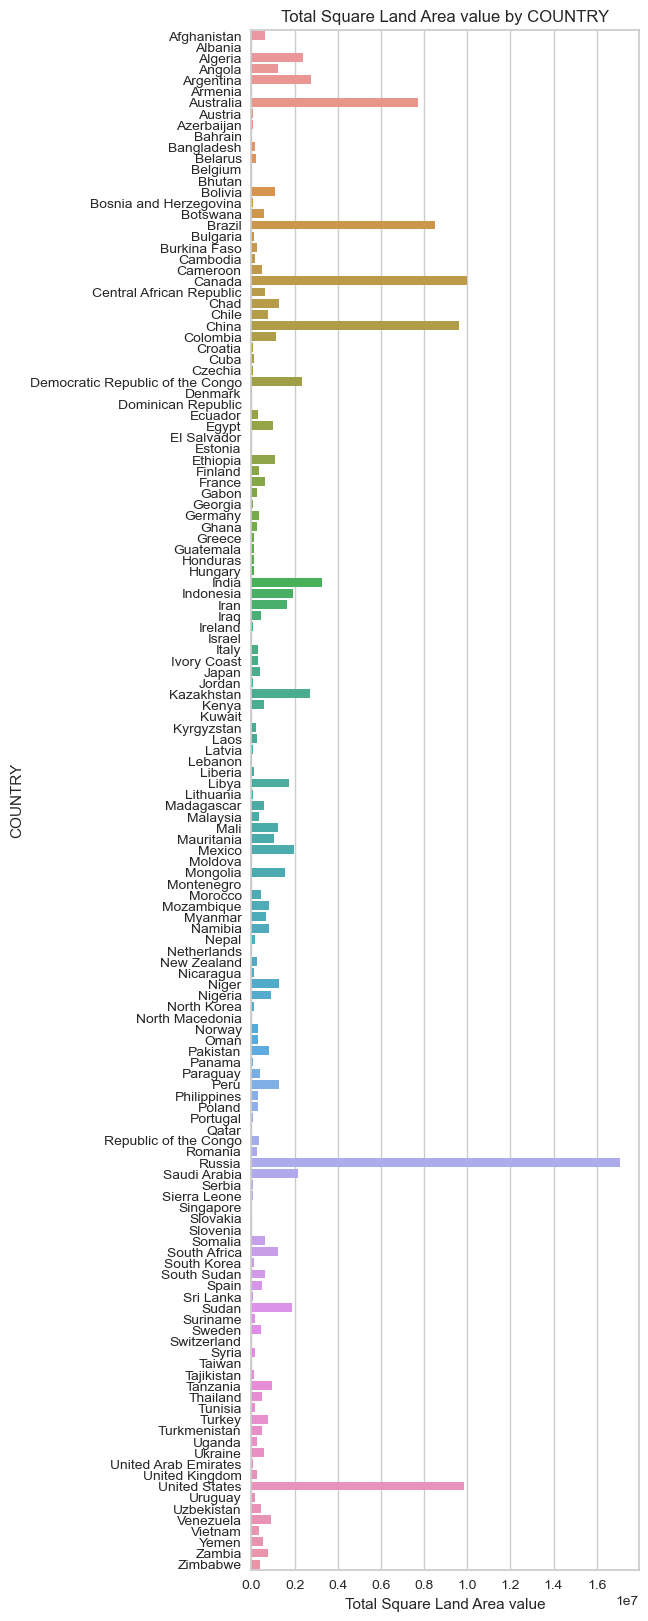

In [124]:
plt.figure(figsize=(5,20))
sns.barplot(x='Total Square Land Area value', y='COUNTRY',data=df)
plt.title('Total Square Land Area value by COUNTRY');

#### <font color=#2da6f7> Total Coastline Coverage value İlgileniyoruz

In [126]:
df['Total Coastline Coverage value']=df['Total Coastline Coverage value'].replace(',','',regex=True)

In [127]:
df['Total Coastline Coverage value']=df['Total Coastline Coverage value'].fillna(0).astype(int)

In [128]:
df['Total Coastline Coverage value']=df['Total Coastline Coverage value'].astype(int)

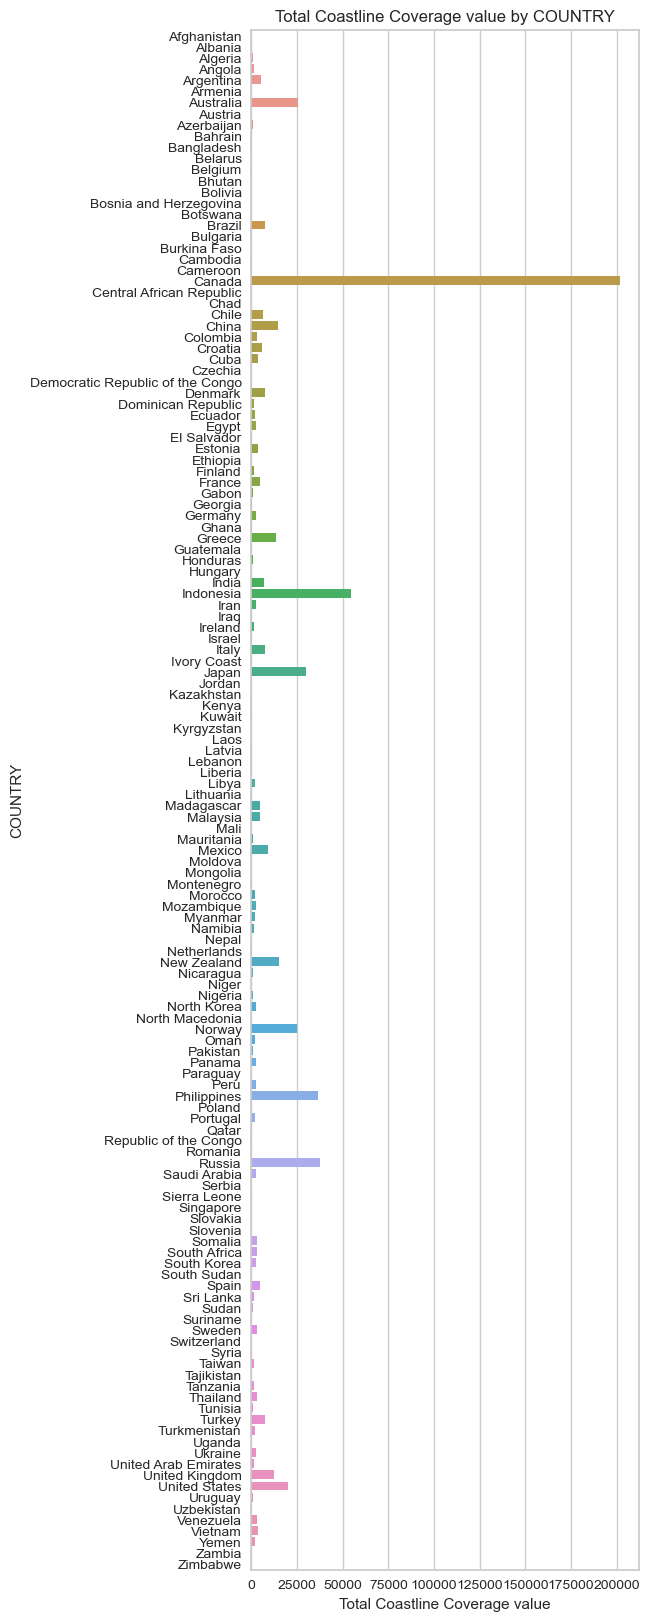

In [129]:
plt.figure(figsize=(5,20))
sns.barplot(x='Total Coastline Coverage value', y='COUNTRY',data=df)
plt.title('Total Coastline Coverage value by COUNTRY');

#### <font color=#2da6f7> Total Waterway Coverage value İlgileniyoruz

In [131]:
df['Total Waterway Coverage value']=df['Total Waterway Coverage value'].replace(',','',regex=True)

In [132]:
df['Total Waterway Coverage value']=df['Total Waterway Coverage value'].astype(int)

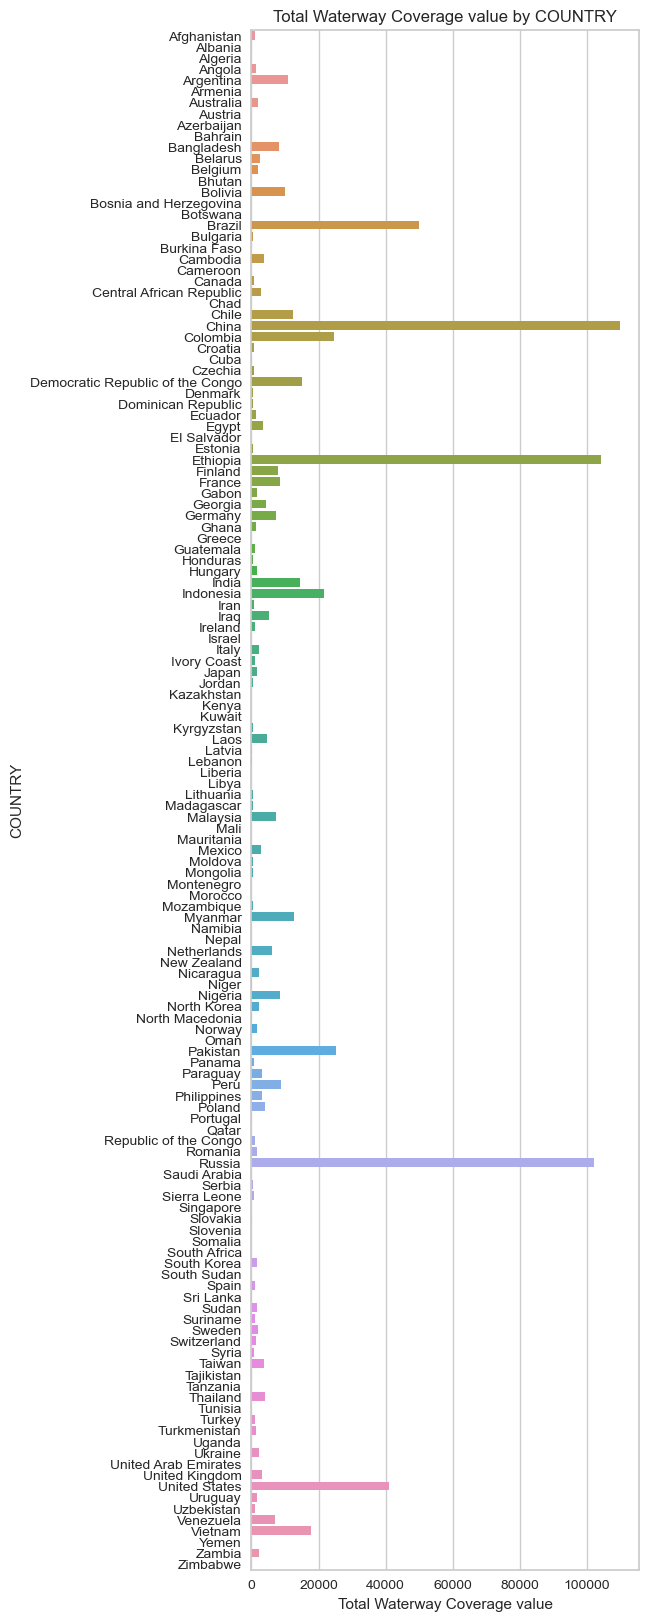

In [133]:
plt.figure(figsize=(5,20))
sns.barplot(x='Total Waterway Coverage value', y='COUNTRY',data=df)
plt.title('Total Waterway Coverage value by COUNTRY');

#### <font color=#2da6f7> Total Border Coverage value İlgileniyoruz

In [135]:
df['Total Border Coverage value']=df['Total Border Coverage value'].replace(',','',regex=True)

In [136]:
df['Total Border Coverage value']=df['Total Border Coverage value'].fillna(0)

In [137]:
df['Total Border Coverage value']=df['Total Border Coverage value'].astype(int)

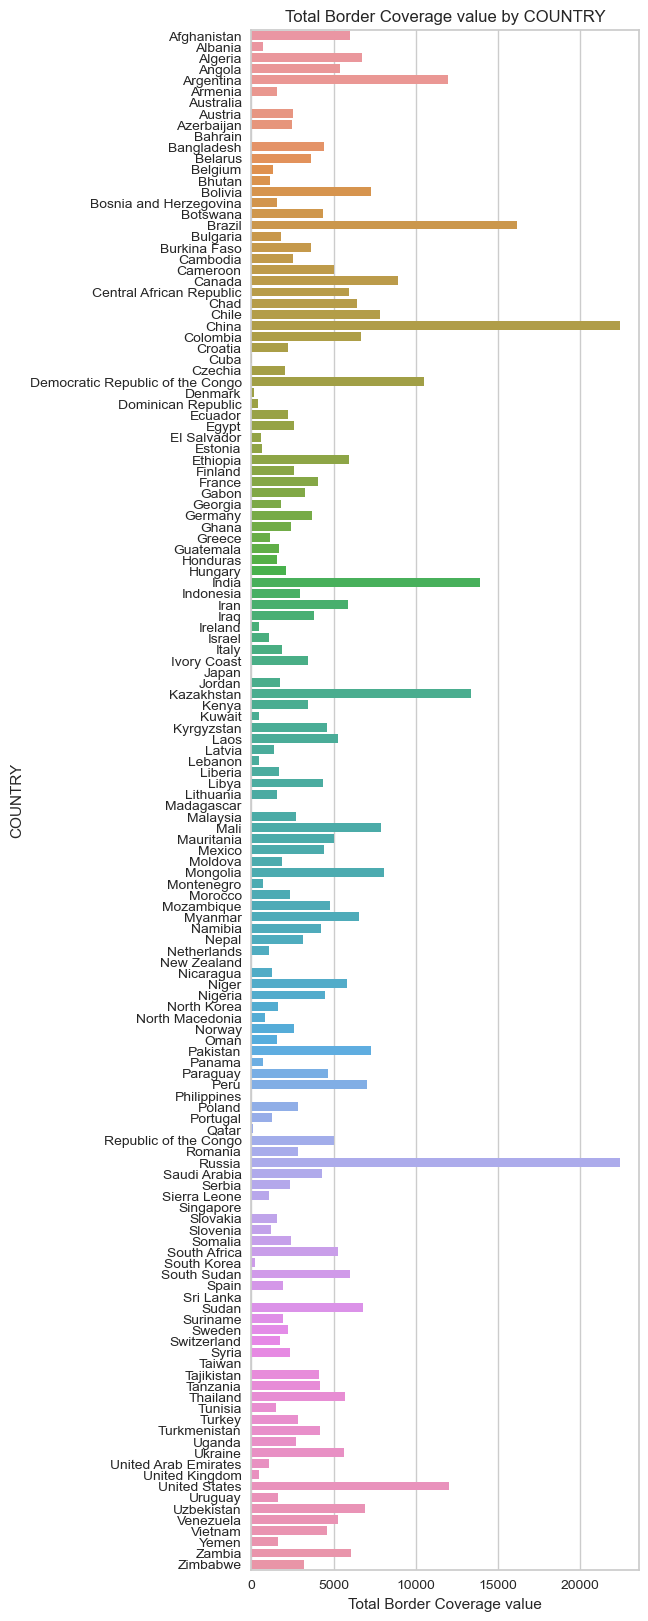

In [138]:
plt.figure(figsize=(5,20))
sns.barplot(x='Total Border Coverage value', y='COUNTRY',data=df)
plt.title('Total Border Coverage value by COUNTRY');

In [139]:
df

0                             COUNTRY  Military Strength Power Index  \
1                         Afghanistan                              1   
2                             Albania                              2   
3                             Algeria                              0   
4                              Angola                              0   
5                           Argentina                              0   
6                             Armenia                              2   
7                           Australia                              0   
8                             Austria                              0   
9                          Azerbaijan                              0   
10                            Bahrain                              1   
11                         Bangladesh                              0   
12                            Belarus                              0   
13                            Belgium                              1   
14                             Bhutan                             10   
15                            Bolivia                              0   
16             Bosnia and Herzegovina                              3   
17                           Botswana                              2   
18                             Brazil                              0   
19                           Bulgaria                              0   
20                       Burkina Faso                              1   
21                           Cambodia                              2   
22                           Cameroon                              1   
23                             Canada                              0   
24           Central African Republic                              3   
25                               Chad                              1   
26                              Chile                              0   
27                              China                              0   
28                           Colombia                              0   
29                            Croatia                              1   
30                               Cuba                              1   
31                            Czechia                              0   
32   Democratic Republic of the Congo                              1   
33                            Denmark                              0   
34                 Dominican Republic                              2   
35                            Ecuador                              1   
36                              Egypt                              0   
37                        El Salvador                              3   
38                            Estonia                              2   
39                           Ethiopia                              0   
40                            Finland                              0   
41                             France                              0   
42                              Gabon                              3   
43                            Georgia                              1   
44                            Germany                              0   
45                              Ghana                              2   
46                             Greece                              0   
47                          Guatemala                              1   
48                           Honduras                              2   
49                            Hungary                              0   
50                              India                              0   
51                          Indonesia                              0   
52                               Iran                              0   
53                               Iraq                              0   
54                            Ireland                              1   
55                             Israel   

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 1 to 138
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   COUNTRY                                  138 non-null    object 
 1   Military Strength Power Index            138 non-null    int32  
 2   Aircraft Strength value                  138 non-null    int32  
 3   Fighter/Interceptor Strength value       138 non-null    int32  
 4   Attack Aircraft Strength value           138 non-null    int32  
 5   Transport Aircraft Fleet Strength value  138 non-null    int32  
 6   Trainer Aircraft Fleet value             138 non-null    int32  
 7   Helicopter Fleet Strength value          138 non-null    int32  
 8   Attack Helicopter Fleet Strength value   138 non-null    int32  
 9   Tank Strength value                      138 non-null    int32  
 10  AFV/APC Strength value                   138 non-n

In [141]:
df.isnull().sum().sort_values(ascending=False)

0
COUNTRY                                    0
Submarine Fleet Strength value             0
Total Waterway Coverage value              0
Total Coastline Coverage value             0
Total Square Land Area value               0
Total Population value                     0
Available Manpower value                   0
Proven Oil Reserves value                  0
Oil Consumption value                      0
Oil Production value                       0
Airport Totals value                       0
External Debt value                        0
defense spending budget value              0
Frigate Fleet Strength value               0
Destroyer Fleet Strength value             0
Aircraft Carrier Fleet Strength value      0
Military Strength Power Index              0
Navy Fleet Strengths value                 0
Rocket Projector Strength value            0
Towed Artillery Strength value             0
Self-Propelled Artillery Strength value    0
AFV/APC Strength value                     0
Tank Str

## <font color=#fa7efc> Modelling

In [143]:
df.columns

Index(['COUNTRY', 'Military Strength Power Index', 'Aircraft Strength value',
       'Fighter/Interceptor Strength value', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength value',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength value',
       'Attack Helicopter Fleet Strength value', 'Tank Strength value',
       'AFV/APC Strength value', 'Self-Propelled Artillery Strength value',
       'Towed Artillery Strength value', 'Rocket Projector Strength value',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength value',
       'Submarine Fleet Strength value', 'Destroyer Fleet Strength value',
       'Frigate Fleet Strength value', 'defense spending budget value',
       'External Debt value', 'Airport Totals value', 'Oil Production value',
       'Oil Consumption value', 'Proven Oil Reserves value',
       'Available Manpower value', 'Total Population value',
       'Total Square Land Area value', 'Total Coastline Coverage value

In [144]:
x=df[['Military Strength Power Index','Aircraft Strength value','Fighter/Interceptor Strength value','Attack Aircraft Strength value','Transport Aircraft Fleet Strength value','Trainer Aircraft Fleet value','Helicopter Fleet Strength value',
     'Attack Helicopter Fleet Strength value','Tank Strength value','AFV/APC Strength value','Self-Propelled Artillery Strength value','Towed Artillery Strength value','Navy Fleet Strengths value','Aircraft Carrier Fleet Strength value',
     'Submarine Fleet Strength value','Destroyer Fleet Strength value','Frigate Fleet Strength value','defense spending budget value','External Debt value','Airport Totals value','Oil Production value','Oil Consumption value',
     'Proven Oil Reserves value', 'Available Manpower value', 'Total Population value', 'Total Square Land Area value', 'Total Coastline Coverage value', 'Total Waterway Coverage value', 'Total Border Coverage value']]

In [145]:
x.head()

0  Military Strength Power Index  Aircraft Strength value  \
1                              1                      260   
2                              2                       19   
3                              0                      551   
4                              0                      295   
5                              0                      227   

0  Fighter/Interceptor Strength value  Attack Aircraft Strength value  \
1                                   0                              25   
2                                   0                               0   
3                                 103                              22   
4                                  72                              18   
5                                  24                               7   

0  Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet value  \
1                                       30                             0   
2                                        0                             0   
3                                       59                            87   
4                                       30                            47   
5                                        9                            64   

0  Helicopter Fleet Strength value  Attack Helicopter Fleet Strength value  \
1                              187                                       0   
2                               19                                       0   
3                              257                                      45   
4                              126                                      15   
5                              100                                       0   

0  Tank Strength value  AFV/APC Strength value  \
1                    0                    1062   
2                    0                     467   
3                  880                    7361   
4                  379                     595   
5                  370                     739   

0  Self-Propelled Artillery Strength value  Towed Artillery Strength value  \
1                                        0                             176   
2                                        0                               0   
3                                      320                             240   
4                                       28                             357   
5                                       83                             172   

0  Navy Fleet Strengths value  Aircraft Carrier Fleet Strength value  \
1                           0                                      0   
2                          38                                      0   
3                         201                                      0   
4                          57                                      0   
5                          49                                      0   

0  Submarine Fleet Strength value  Destroyer Fleet Strength value  \
1                               0                               0   
2                               0                               0   
3                               6                               0   
4                               0                               0   
5                               2                               4   

0  Frigate Fleet Strength value  defense spending budget value  \
1                             0                   1.200000e+10   
2                             0                   2.500000e+08   
3                             5                   1.300000e+10   
4                             0                   7.000000e+09   
5                             0                   4.200000e+09   

0  External Debt value  Airport Totals value  Oil Production value  \
1         2.840000e+09                    43                     0   
2         9.505000e+09                     4                 16000   
3         6.260000e+09                   15

In [146]:
KM=KMeans(5)
#KMeans(x) 0'dan başlayıp x'e(x dahil değil) kadar sayıları alıyor

In [147]:
KM=KM.fit(x)

In [148]:
tahmin=KM.predict(x)

In [149]:
tahmin

array([0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0,
       0, 0, 0, 0, 0, 0])

In [150]:
x['Cluster']=tahmin

In [151]:
x.head()

0  Military Strength Power Index  Aircraft Strength value  \
1                              1                      260   
2                              2                       19   
3                              0                      551   
4                              0                      295   
5                              0                      227   

0  Fighter/Interceptor Strength value  Attack Aircraft Strength value  \
1                                   0                              25   
2                                   0                               0   
3                                 103                              22   
4                                  72                              18   
5                                  24                               7   

0  Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet value  \
1                                       30                             0   
2                                        0                             0   
3                                       59                            87   
4                                       30                            47   
5                                        9                            64   

0  Helicopter Fleet Strength value  Attack Helicopter Fleet Strength value  \
1                              187                                       0   
2                               19                                       0   
3                              257                                      45   
4                              126                                      15   
5                              100                                       0   

0  Tank Strength value  AFV/APC Strength value  \
1                    0                    1062   
2                    0                     467   
3                  880                    7361   
4                  379                     595   
5                  370                     739   

0  Self-Propelled Artillery Strength value  Towed Artillery Strength value  \
1                                        0                             176   
2                                        0                               0   
3                                      320                             240   
4                                       28                             357   
5                                       83                             172   

0  Navy Fleet Strengths value  Aircraft Carrier Fleet Strength value  \
1                           0                                      0   
2                          38                                      0   
3                         201                                      0   
4                          57                                      0   
5                          49                                      0   

0  Submarine Fleet Strength value  Destroyer Fleet Strength value  \
1                               0                               0   
2                               0                               0   
3                               6                               0   
4                               0                               0   
5                               2                               4   

0  Frigate Fleet Strength value  defense spending budget value  \
1                             0                   1.200000e+10   
2                             0                   2.500000e+08   
3                             5                   1.300000e+10   
4                             0                   7.000000e+09   
5                             0                   4.200000e+09   

0  External Debt value  Airport Totals value  Oil Production value  \
1         2.840000e+09                    43                     0   
2         9.505000e+09                     4                 16000   
3         6.260000e+09                   15

In [152]:
silhouette_score(x,tahmin)

0.8675195540746111

In [153]:
#wscc = within cluster sun of squares = küme içi toplam kare kaybı
wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.9227153206136329
0.8995442950361631
0.8671436271439987
0.8675195540746111
0.7789462745536555
0.7817947546427709
0.7847423623940265
0.6833747949746694


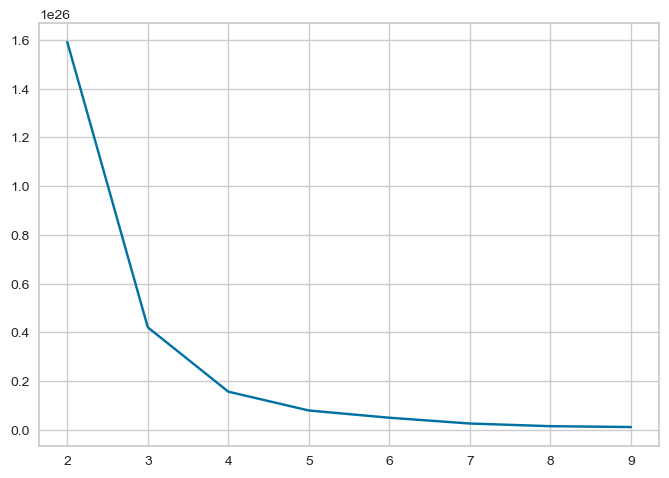

In [154]:
plt.plot(range(2,10),wcss);

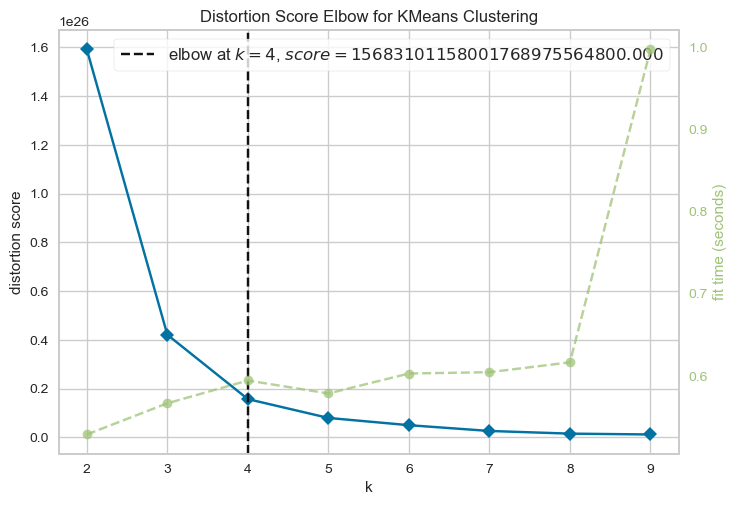

In [155]:
vis=KElbowVisualizer(KM,k=(2,10))
vis.fit(x)
vis.show();

### <font color=#b798fa> Hierachical Clustering

In [157]:
data=linkage(x,method='ward', metric='euclidean')

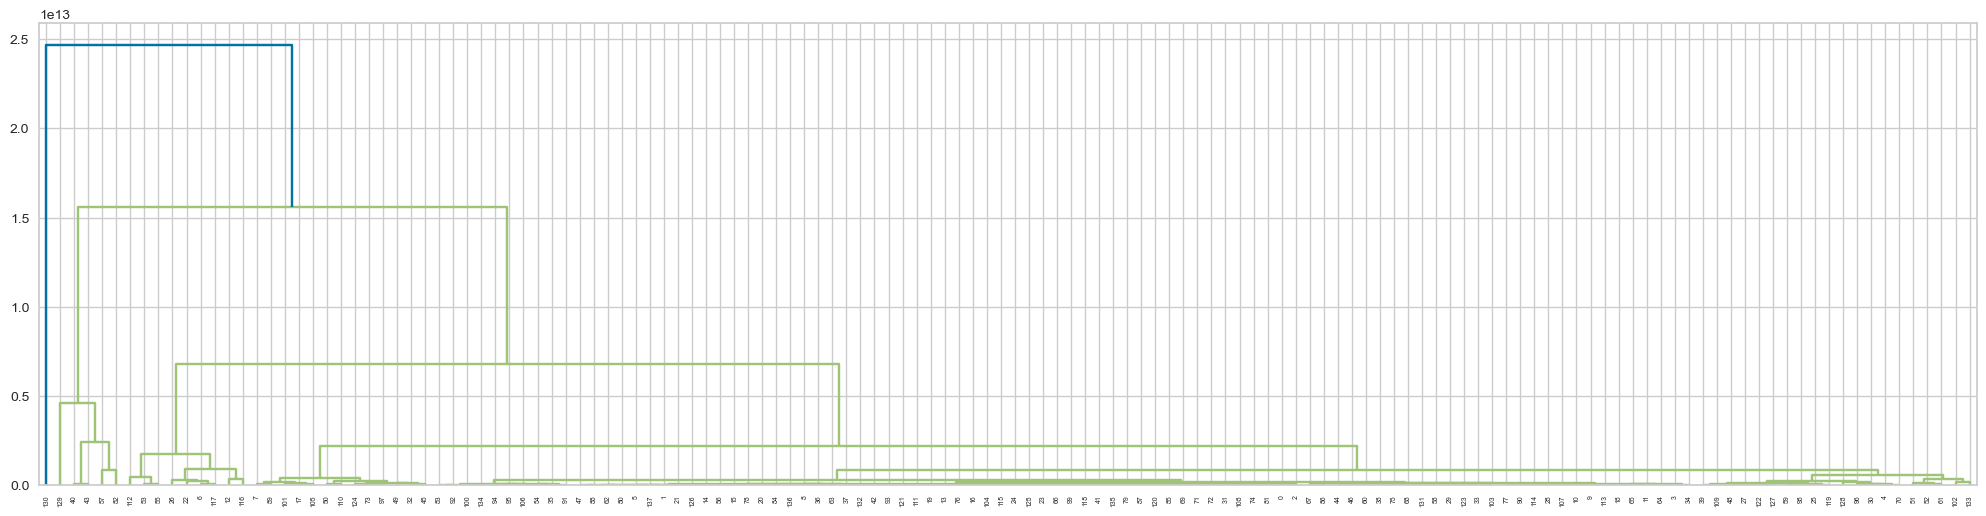

In [158]:
plt.figure(figsize=(25,6))
dendrogram(data);

In [159]:
x['COUNTRY']=df['COUNTRY']
x

0    Military Strength Power Index  Aircraft Strength value  \
1                                1                      260   
2                                2                       19   
3                                0                      551   
4                                0                      295   
5                                0                      227   
6                                2                       64   
7                                0                      464   
8                                0                      120   
9                                0                      147   
10                               1                      109   
11                               0                      177   
12                               0                      202   
13                               1                      148   
14                              10                        2   
15                               0                       69   
16                               3                       19   
17                               2                       45   
18                               0                      715   
19                               0                       63   
20                               1                       16   
21                               2                       22   
22                               1                       29   
23                               0                      385   
24                               3                        3   
25                               1                       35   
26                               0                      282   
27                               0                     3210   
28                               0                      469   
29                               1                       78   
30                               1                       80   
31                               0                       95   
32                               1                       53   
33                               0                      113   
34                               2                       49   
35                               1                      108   
36                               0                     1054   
37                               3                       51   
38                               2                        7   
39                               0                       86   
40                               0                      194   
41                               0                     1229   
42                               3                       23   
43                               1                       66   
44                               0                      712   
45                               2                       24   
46                               0                      566   
47                               1                       33   
48                               2                       46   
49                               0                       47   
50                               0                     2123   
51                               0                      462   
52                               0                      509   
53                               0                      348   
54                               1                       19   
55                               0                      589   
56                               0                      860   
57                               2                        8   
58                               0                     1561   
59                               1                      278   
60                               0                      222   
61                               1                      150   
62                               1                       85   
63                             

In [160]:
x[['COUNTRY','Cluster']]

0                             COUNTRY  Cluster
1                         Afghanistan        0
2                             Albania        0
3                             Algeria        0
4                              Angola        0
5                           Argentina        0
6                             Armenia        0
7                           Australia        3
8                             Austria        0
9                          Azerbaijan        0
10                            Bahrain        0
11                         Bangladesh        0
12                            Belarus        0
13                            Belgium        3
14                             Bhutan        0
15                            Bolivia        0
16             Bosnia and Herzegovina        0
17                           Botswana        0
18                             Brazil        0
19                           Bulgaria        0
20                       Burkina Faso        0
21                           Cambodia        0
22                           Cameroon        0
23                             Canada        3
24           Central African Republic        0
25                               Chad        0
26                              Chile        0
27                              China        3
28                           Colombia        0
29                            Croatia        0
30                               Cuba        0
31                            Czechia        0
32   Democratic Republic of the Congo        0
33                            Denmark        0
34                 Dominican Republic        0
35                            Ecuador        0
36                              Egypt        0
37                        El Salvador        0
38                            Estonia        0
39                           Ethiopia        0
40                            Finland        0
41                             France        2
42                              Gabon        0
43                            Georgia        0
44                            Germany        2
45                              Ghana        0
46                             Greece        0
47                          Guatemala        0
48                           Honduras        0
49                            Hungary        0
50                              India        0
51                          Indonesia        0
52                               Iran        0
53                               Iraq        0
54                            Ireland        3
55                             Israel        0
56                              Italy        3
57                        Ivory Coast        0
58                              Japan        3
59                             Jordan        0
60                         Kazakhstan        0
61                              Kenya        0
62                             Kuwait        0
63                         Kyrgyzstan        0
64                               Laos        0
65                             Latvia        0
66                            Lebanon        0
67                            Liberia        0
68                              Libya        0
69                          Lithuania        0
70                         Madagascar        0
71                           Malaysia        0
72                               Mali        0
73                         Mauritania        0
74                             Mexico        0
75                            Moldova        0
76                           Mongolia        0
77                         Montenegro        0
78                            Morocco        0
79                         Mozambique        0
80                            Myanmar        0
81                            Namibia        0
82                              Nepal        0
83                        Netherlands        2
84                        New Zealand        0
85   

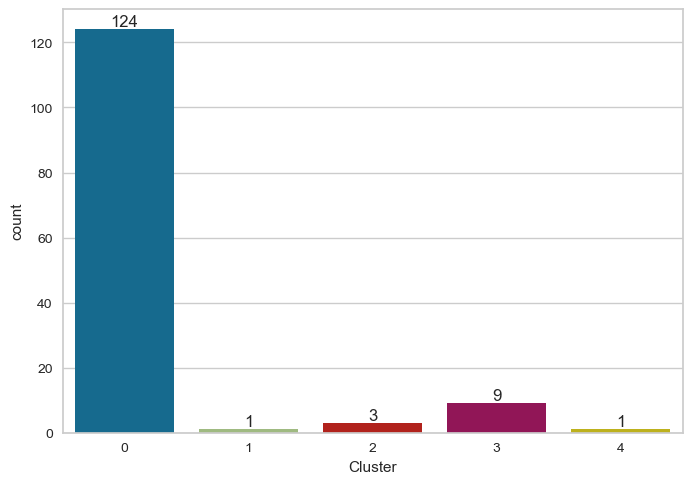

In [161]:
ax=sns.countplot(data=x,x='Cluster')
ax.bar_label(ax.containers[0]);

In [ ]:
cols = list(x.columns)
cols.insert(0, cols.pop(cols.index('COUNTRY')))
x = x[cols]

In [309]:
x[x['Cluster']==0]

0                             COUNTRY  Military Strength Power Index  \
1                         Afghanistan                              1   
2                             Albania                              2   
3                             Algeria                              0   
4                              Angola                              0   
5                           Argentina                              0   
6                             Armenia                              2   
8                             Austria                              0   
9                          Azerbaijan                              0   
10                            Bahrain                              1   
11                         Bangladesh                              0   
12                            Belarus                              0   
14                             Bhutan                             10   
15                            Bolivia                              0   
16             Bosnia and Herzegovina                              3   
17                           Botswana                              2   
18                             Brazil                              0   
19                           Bulgaria                              0   
20                       Burkina Faso                              1   
21                           Cambodia                              2   
22                           Cameroon                              1   
24           Central African Republic                              3   
25                               Chad                              1   
26                              Chile                              0   
28                           Colombia                              0   
29                            Croatia                              1   
30                               Cuba                              1   
31                            Czechia                              0   
32   Democratic Republic of the Congo                              1   
33                            Denmark                              0   
34                 Dominican Republic                              2   
35                            Ecuador                              1   
36                              Egypt                              0   
37                        El Salvador                              3   
38                            Estonia                              2   
39                           Ethiopia                              0   
40                            Finland                              0   
42                              Gabon                              3   
43                            Georgia                              1   
45                              Ghana                              2   
46                             Greece                              0   
47                          Guatemala                              1   
48                           Honduras                              2   
49                            Hungary                              0   
50                              India                              0   
51                          Indonesia                              0   
52                               Iran                              0   
53                               Iraq                              0   
55                             Israel                              0   
57                        Ivory Coast                              2   
59                             Jordan                              1   
60                         Kazakhstan                              0   
61                              Kenya                              1   
62                             Kuwait                              1   
63                         Kyrgyzstan                              1   
64                               Laos   

In [311]:
x[x['Cluster']==1]

0          COUNTRY  Military Strength Power Index  Aircraft Strength value  \
131  United States                              0                    13264   

0    Fighter/Interceptor Strength value  Attack Aircraft Strength value  \
131                                2085                             715   

0    Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet value  \
131                                      945                          2643   

0    Helicopter Fleet Strength value  Attack Helicopter Fleet Strength value  \
131                             5768                                     967   

0    Tank Strength value  AFV/APC Strength value  \
131                 6289                   39253   

0    Self-Propelled Artillery Strength value  Towed Artillery Strength value  \
131                                     1465                            2740   

0    Navy Fleet Strengths value  Aircraft Carrier Fleet Strength value  \
131                         490                                     20   

0    Submarine Fleet Strength value  Destroyer Fleet Strength value  \
131                              66                              91   

0    Frigate Fleet Strength value  defense spending budget value  \
131                             0                   7.500000e+11   

0    External Debt value  Airport Totals value  Oil Production value  \
131         1.791000e+13                 13513               9352000   

0    Oil Consumption value  Proven Oil Reserves value  \
131               20000000               3.652000e+10   

0    Available Manpower value  Total Population value  \
131                 144872845               329256465   

0    Total Square Land Area value  Total Coastline Coverage value  \
131                       9826675                           19924   

0    Total Waterway Coverage value  Total Border Coverage value  Cluster  
131                          41009                        12048        1

In [313]:
x[x['Cluster']==2]

0       COUNTRY  Military Strength Power Index  Aircraft Strength value  \
41       France                              0                     1229   
44      Germany                              0                      712   
83  Netherlands                              0                      168   

0   Fighter/Interceptor Strength value  Attack Aircraft Strength value  \
41                                 269                               0   
44                                 128                              74   
83                                  61                               1   

0   Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet value  \
41                                      121                           187   
44                                       71                            26   
83                                        4                            27   

0   Helicopter Fleet Strength value  Attack Helicopter Fleet Strength value  \
41                              589                                      62   
44                              386                                      56   
83                               75                                      28   

0   Tank Strength value  AFV/APC Strength value  \
41                  528                    6028   
44                  245                    4583   
83                   18                    1546   

0   Self-Propelled Artillery Strength value  Towed Artillery Strength value  \
41                                      109                              12   
44                                      108                               0   
83                                       57                             160   

0   Navy Fleet Strengths value  Aircraft Carrier Fleet Strength value  \
41                         180                                      4   
44                          80                                      0   
83                          63                                      0   

0   Submarine Fleet Strength value  Destroyer Fleet Strength value  \
41                               9                              11   
44                               6                               0   
83                               4                               0   

0   Frigate Fleet Strength value  defense spending budget value  \
41                            11                   4.150000e+10   
44                             9                   5.000000e+10   
83                             6                   1.241900e+10   

0   External Debt value  Airport Totals value  Oil Production value  \
41         5.360000e+12                   464                 15170   
44         5.326000e+12                   539                 43410   
83         4.063000e+12                    29                 18170   

0   Oil Consumption value  Proven Oil Reserves value  \
41                1600000                 72350000.0   
44                2500000                145400000.0   
83                 840000                113200000.0   

0   Available Manpower value  Total Population value  \
41                  30111868                67364357   
44                  37010559                80457737   
83                   7820960                17151228   

0   Total Square Land Area value  Total Coastline Coverage value  \
41                        643801                            4853   
44                        357022                            2389   
83                         41543                             451   

0   Total Waterway Coverage value  Total Border Coverage value  Cluster  
41                           8501                         4072        2  
44                           7467                         3694        2  
83                           6237                         1053        2

In [317]:
x[x['Cluster']==3]

0        COUNTRY  Military Strength Power Index  Aircraft Strength value  \
7      Australia                              0                      464   
13       Belgium                              1                      148   
23        Canada                              0                      385   
27         China                              0                     3210   
54       Ireland                              1                       19   
56         Italy                              0                      860   
58         Japan                              0                     1561   
113        Spain                              0                      512   
118  Switzerland                              0                      169   

0    Fighter/Interceptor Strength value  Attack Aircraft Strength value  \
7                                    82                               6   
13                                   43                               0   
23                                   62                               0   
27                                 1232                             371   
54                                    0                               0   
56                                   99                             110   
58                                  279                              12   
113                                 137                              12   
118                                  54                               0   

0    Transport Aircraft Fleet Strength value  Trainer Aircraft Fleet value  \
7                                         38                           174   
13                                        12                            64   
23                                        38                           135   
27                                       224                           314   
54                                         0                             8   
56                                        38                           185   
58                                        60                           427   
113                                       46                           162   
118                                       18                            54   

0    Helicopter Fleet Strength value  Attack Helicopter Fleet Strength value  \
7                                133                                      22   
13                                29                                       0   
23                               145                                       0   
27                               911                                     281   
54                                 8                                       0   
56                               439                                      59   
58                               637                                     119   
113                              162                                      19   
118                               42                                       0   

0    Tank Strength value  AFV/APC Strength value  \
7                     59                    3051   
13                     0                     984   
23                    80                    1973   
27                  3500                   33000   
54                     0                     124   
56                   200                    6947   
58                  1004                    3130   
113                  327                    2023   
118                  326                    1338   

0    Self-Propelled Artillery Strength value  Towed Artillery Strength value  \
7                                          0                              54   
13                                         0                               0   
23                                         0                             133   
27                                      3800                     